$$ \Large{\textbf{Digital Signal Processing and Deep Learning:  Environment Sound Classification }} $$   
$$ \large{\textbf{Part IV: Complex Wavelet Transforms + Mel-Spectrograms and Convolutional Neural Network}} $$

$$ \small{\textbf{Dr. Stéphane DEDIEU, Dec. 2022 - Jan. 2023 - REV Summer 2024 }} $$

# Introduction

<br>

<span style="color:#4169E1">  

Supervised classification of environmental sound based on ESC-10 dataset, that contains 10 classes of environmental sounds. 
The emphasis is on time-frequency analysis and feature extraction with complex Continuous Wavelet Transform (CWT).
    
The current Jupyter Notebook presents the methodology and results with <b> a two stages Multi features CNN model</b>: 
- Complex Continuous Wavelet Transform magnitude + phase
- Mel-spectrograms. 

The ESC-10 dataset is a subset of the ESC-50 dataset built by Dr. Karol Piczak and described in the following article:

[1] "Karol J. Piczak. 2015. "ESC: Dataset for Environmental Sound Classification." In Proceedings of the 23rd ACM international conference on Multimedia (MM '15). Association for Computing Machinery, New York, NY, USA, 1015–1018. https://doi.org/10.1145/2733373.2806390".

ESC-50 dataset is available from Dr. Piczak's Github: https://github.com/karoldvl/ESC-50/

The following recent article is a descriptive survey for Environmental sound classification (ESC) detailing datasets, preprocessing techniques, features and classifiers. And their accuracy.

[2] Anam Bansal, Naresh Kumar Garg, "Environmental Sound Classification: A descriptive review of the literature, Intelligent Systems with Applications, Volume 16, 2022, 200115, ISSN 2667-3053, https://doi.org/10.1016/j.iswa.2022.200115.

At that point, and before we start working on more advanced techniques, we:

- work with the ESC10 data-subset (10 classes of sounds)
- test mel-spectrograms and wavelet transforms
- train a Convolution Neural Network
- target an accuracy close to 100%
    

We develop a 2 stages CNN (Convolutional Neural Network) model that achieves 99% accuracy.  

- Stage I:   Pre-classification in two classes:  A –  B after analyzing sounds in the ESC-10 dataset. 
Feature:  Mel-spectrograms in the frequency range 0-2 kHz.
Model:    Convolutional Neural Network

- Stage II:  Classification in 10 classes:  0.... 9  using multi-features data
Multi-feature: <b>  we apply two sets of Complex continuous wavelet transform (CWT) to the two classes A and B </b> + mel-spectrograms  
Model:             Convolutional Neural Networks.     
    
After training a Convolutionnal Neural Network with 3 series of 128x128 images: CWT scalograms magnitude, CWT scalograms phase, mel-spectrograms, <b>maximum accuracy= 99 %. </b> <br> 
    
At that point, the exercise is more about optimal selection of complex CWT: we will not use data augmentation, cross-validation, therefore there is room for improving the CNN.  
    
Our results can be compared with best ESC-10 models reported in [3]. https://doi.org/10.1016/j.apacoust.2020.107581

The average human classification for this dataset is 95.7%. 

<br>

<b> Plan  </b> 
    
- I   Dataset ESC-10
- II  Analysis of sounds/noises 
- III Classification Methodology
- IV  Results
- V   Conclusions
- VI  References 
- VII Python Code 
    
    
<b> Potential Applications </b> 

Applications of Time Frequency analysis and multi-feature CNN classification with complex continuous wavelet transforms (CWT): 

- <b> Speech enhancement</b> Voice Activity Detection, Denoising
- <b> Rotating machinery </b> Failure Detection: bearings, motors, compressors, rotors.  
- <b> ECG </b> Cardiovascular disease (CVD) detection. Automatic Diagnosis: arrhythmia, atrial fibrillation, heart failure. 
- <b> HVAC </b> Fault detection and diagnosis (FDD): Pump, valves.      
- <b> Geophysics </b>  seismic signal analysis, identification, underground layers localization. 
    

<br> 
<b>Keywords:</b> Python, TensorFlow, Deep Learning, Complex Continuous Wavelets 

# Dataset ESC-10

<span style="color:#4169E1">  The ESC-10 dataset <b> is a subset of the ESC-50 dataset</b> described below. 

| <sub>Animals</sub> | <sub>Natural soundscapes & water sounds </sub> | <sub>Human, non-speech sounds</sub> | <sub>Interior/domestic sounds</sub> | <sub>Exterior/urban noises</sub> |
| :--- | :--- | :--- | :--- | :--- |
| <sub>Dog</sub> | <sub>Rain</sub> | <sub>Crying baby</sub> | <sub>Door knock</sub> | <sub>Helicopter</sub> |
| <sub>Rooster</sub> | <sub>Sea waves</sub> | <sub>Sneezing</sub> | <sub>Mouse click</sub> | <sub>Chainsaw</sub> |
| <sub>Pig</sub> | <sub>Crackling fire</sub> | <sub>Clapping</sub> | <sub>Keyboard typing</sub> | <sub>Siren</sub> |
| <sub>Cow</sub> | <sub>Crickets</sub> | <sub>Breathing</sub> | <sub>Door, wood creaks</sub> | <sub>Car horn</sub> |
| <sub>Frog</sub> | <sub>Chirping birds</sub> | <sub>Coughing</sub> | <sub>Can opening</sub> | <sub>Engine</sub> |
| <sub>Cat</sub> | <sub>Water drops</sub> | <sub>Footsteps</sub> | <sub>Washing machine</sub> | <sub>Train</sub> |
| <sub>Hen</sub> | <sub>Wind</sub> | <sub>Laughing</sub> | <sub>Vacuum cleaner</sub> | <sub>Church bells</sub> |
| <sub>Insects (flying)</sub> | <sub>Pouring water</sub> | <sub>Brushing teeth</sub> | <sub>Clock alarm</sub> | <sub>Airplane</sub> |
| <sub>Sheep</sub> | <sub>Toilet flush</sub> | <sub>Snoring</sub> | <sub>Clock tick</sub> | <sub>Fireworks</sub> |
| <sub>Crow</sub> | <sub>Thunderstorm</sub> | <sub>Drinking, sipping</sub> | <sub>Glass breaking</sub> | <sub>Hand saw</sub> |



> ###### [Overview](#esc-50-dataset-for-environmental-sound-classification) | [Download](#download) | [Results](#results) | [Repository content](#repository-content) | [License](#license) | [Citing](#citing) | [Caveats](#caveats) | [Changelog](#changelog)
>
> <a href="https://circleci.com/gh/karoldvl/ESC-50"><img src="https://circleci.com/gh/karoldvl/ESC-50.svg?style=svg" /></a>&nbsp;
<a href="LICENSE"><img src="https://img.shields.io/badge/license-CC%20BY--NC-blue.svg" />&nbsp;
<a href="https://github.com/karoldvl/ESC-50/archive/master.zip"><img src="https://img.shields.io/badge/download-.zip-ff69b4.svg" alt="Download" /></a>&nbsp;

<span style="color:#4169E1">  The **ESC-50 dataset** is a labeled collection of 2000 environmental audio recordings suitable for benchmarking methods of environmental sound classification.

<span style="color:#4169E1">  The dataset consists of 5-second-long recordings organized into 50 semantical classes (with 40 examples per class) loosely arranged into 5 major categories:
    
    
    
| Class | Label | 
| :--- | :--- |
| Dog bark| 0 | 
| Rain | 1 | 
| Seawaves | 2 | 
| Baby cry | 3| 
| Clock tick | 4 |
| Person sneeze | 5 | 
| Helicopter | 6 | 
| Chainsaw | 7 | 
| Rooster | 8 | 
| Firecrackling | 9 | 

<span style="color:#4169E1"> Clips in this dataset have been manually extracted from public field recordings gathered by the **[Freesound.org project](http://freesound.org/)**. The dataset has been prearranged into 5 folds for comparable cross-validation, making sure that fragments from the same original source file are contained in a single fold.

<span style="color:#4169E1">  A more thorough description of the dataset is available in the original [paper](http://karol.piczak.com/papers/Piczak2015-ESC-Dataset.pdf) with some supplementary materials on GitHub: **[ESC: Dataset for Environmental Sound Classification - paper replication data](https://github.com/karoldvl/paper-2015-esc-dataset)**.

### Repository content

- [`audio/*.wav`](audio/)

  2000 audio recordings in WAV format (5 seconds, 44.1 kHz, mono) with the following naming convention:
  
  `{FOLD}-{CLIP_ID}-{TAKE}-{TARGET}.wav`
  
  - `{FOLD}` - index of the cross-validation fold,
  - `{CLIP_ID}` - ID of the original Freesound clip,
  - `{TAKE}` - letter disambiguating between different fragments from the same Freesound clip,
  - `{TARGET}` - class in numeric format [0, 49].

- [`meta/esc50.csv`](meta/esc50.csv)

  CSV file with the following structure:
  
  | <sub>filename</sub> | <sub>fold</sub> | <sub>target</sub> | <sub>category</sub> | <sub>esc10</sub> | <sub>src_file</sub> | <sub>take</sub> |
  | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
  
  The `esc10` column indicates if a given file belongs to the *ESC-10* subset (10 selected classes, CC BY license).
  
- [`meta/esc50-human.xlsx`](meta/esc50-human.xlsx)

  Additional data pertaining to the crowdsourcing experiment (human classification accuracy).


### License

<span style="color:#4169E1">  The dataset is available under the terms of the [Creative Commons Attribution Non-Commercial license](http://creativecommons.org/licenses/by-nc/3.0/).<br>
A smaller subset (clips tagged as *ESC-10*) is distributed under CC BY (Attribution). <br>
Attributions for each clip are available in the [ LICENSE file](LICENSE).


### Citing

<a href="http://karol.piczak.com/papers/Piczak2015-ESC-Dataset.pdf"><img src="https://img.shields.io/badge/download%20paper-PDF-ff69b4.svg" alt="Download paper in PDF format" title="Download paper in PDF format" align="right" /></a>

<span style="color:#4169E1">  If you find this dataset useful in an academic setting please cite:

> K. J. Piczak. **ESC: Dataset for Environmental Sound Classification**. *Proceedings of the 23rd Annual ACM Conference on Multimedia*, Brisbane, Australia, 2015.
> 
> [DOI: http://dx.doi.org/10.1145/2733373.2806390]

    @inproceedings{piczak2015dataset,
      title = {{ESC}: {Dataset} for {Environmental Sound Classification}},
      author = {Piczak, Karol J.},
      booktitle = {Proceedings of the 23rd {Annual ACM Conference} on {Multimedia}},
      date = {2015-10-13},
      url = {http://dl.acm.org/citation.cfm?doid=2733373.2806390},
      doi = {10.1145/2733373.2806390},
      location = {{Brisbane, Australia}},
      isbn = {978-1-4503-3459-4},
      publisher = {{ACM Press}},
      pages = {1015--1018}
    }



This Jupyter Notebook (v. 6.5.4) was built with Anaconda 2.6.0 

# Analysis of sounds/noises:

<br>
<span style="color:#4169E1"> 
    
The ESC-10 dataset includes <b>400 Ogg Vorbis audio clips</b>, each lasting 5 seconds, with a sampling frequency of 44.1 kHz in 32-bit float format. This collection is divided into 10 different sound categories (<b>10 classes</b>), with each category containing 40 clips:
    
<br>
<span style="color:#4169E1"> 
    
- Class = 01-Dogbark, Label = 0
- Class = 02-Rain, Label = 1
- Class = 03-Seawaves, Label = 2
- Class = 04-Babycry, Label = 3
- Class = 05-Clocktick, Label = 4
- Class = 06-Personsneeze, Label = 5
- Class = 07-Helicopter, Label = 6
- Class = 08-Chainsaw, Label = 7
- Class = 09-Rooster, Label = 8
- Class = 10-Firecrackling, Label = 9

<br>
    
- Sounds like dog barking, baby crying, sneezing, and rooster crowing involve non-linear vibrations and resonances similar to human speech, characterized by a fundamental frequency with harmonics. These sounds are generally non-stationary. 
<br>

- Helicopter and chainsaw noises feature a fundamental frequency and harmonics linked to engine RPM, cylinder count, and rotor blade number for helicopters. These sounds are considered stationary if the engine's RPM remains constant, otherwise, they might be termed pseudo-stationary.  
<br>

- Clock ticks are non-stationary, with an impulse sound at 1 Hz, although some clips show multiple pulses within a second. The ticking noise carries the signature of non-linear mechanical vibration, including fundamental frequencies and harmonics.  
<br>
 
- Rain and sea waves sounds exhibit some degree of stationarity; rain often sounds like white noise, with Gaussian charcteristics. Sea waves are pseudo-stationary due to the variable nature of wave patterns, and rain occasionally includes other sounds like thunder, adding to its non-static quality. No harmonics.
<br>
 
- Fire crackling mainly provides a stationary to pseudo-stationary background, sometimes punctuated by sudden, loud impulses from the crackling flames.   

    
| <p align="center"> <img src="Helico_harmonics.png" width="400"  /> </p> |  
| ---       |   
| <center> <b><i> Example [4] of an helicopter harmonic sound/signal </i></b> </center> |   
    


*from: [4] https://hal.science/FA2020/hal-03219030
    

# Classification Methodology


###  Preliminary Stage

<br>

<span style="color:#4169E1"> 

To streamline our classification process and optimize computational efficiency while preserving essential information, several adjustments were made:

- Reduction of Audio Sampling Frequency: The original sampling rate of 44.1 kHz was reduced to either 16 kHz or 22 kHz. This adjustment lowers the resolution of the audio data, focusing on the frequency ranges most relevant to human hearing and typical sound classifications, thereby reducing processing demands without significantly impacting the quality of sound information needed for classification.
- Trimming Audio Clip Duration: Audio clips were shortened from 5 seconds to 1.25 seconds. This decision was based on signal power analysis, where it was observed that within longer clips, significant portions were silent or contained repetitive patterns (e.g., continuous dog barking or baby crying). By focusing on segments with high signal activity, we ensure that our training data is more dense with relevant sound events, thus reducing unnecessary data volume.
- Signal Normalization: All audio signals were normalized to an amplitude of 1 (0 dBFS), ensuring that the volume of sounds across different recordings is consistent. This normalization aids in comparability and prevents louder sounds from inherently receiving more emphasis solely due to their amplitude.
- Wavelet Transform Analysis: We plotted wavelet transforms for each of the 10 classes to visually and empirically determine the optimal wavelets and parameters for transformation. This method helps in capturing the time-frequency characteristics of our audio signals effectively.
- Mel-Spectrograms and Complex Continuous Wavelet Transform (CWT) Calculation: Both mel-spectrograms and complex CWT were calculated for all audio clips using 128 bins in the frequency/scale domain. Mel-spectrograms provide a perceptual scale of frequency, which is more aligned with human auditory perception, while CWT offers detailed time-frequency resolution.
- Dimensionality Reduction: The size of both scalograms and mel-spectrograms was reduced to 128 points in the time domain. This step, while leading to some loss of detail, significantly reduces the computational load, making the dataset more manageable for training.
- Training the Multi-Features CNN: A Convolutional Neural Network (CNN) was trained using three sets of 128x128 images: 
    - Scalograms Magnitude: Captures the energy distribution in the time-frequency space.
    - Scalograms Phase: Provides phase information, which can be crucial for certain classifications.
    - Mel-Spectrograms: Offers a frequency representation that closely matches human ear sensitivity.


This approach leverages the strengths of both time and frequency domain analyses, providing a robust feature set for our classification model. Detailed justifications and further methodological insights are provided in the accompanying notebook.

This reformulation aims to clarify the steps taken in the data preprocessing and feature extraction phase for an audio classification task, emphasizing the rationale behind each choice.

### STAGE I:  Pre-classification

<br>

<span style="color:#4169E1"> 

In this initial stage, we categorize the sound dataset into two distinct sub-classes, allowing for different classification pathways based on acoustic properties:

Sub-Class Division: One approach divides sounds into non-stationary versus stationary/pseudo-stationary categories. An alternative method separates sounds based on the presence or absence of harmonics.

Feature Selection: We employ various features for this pre-classification:
- Mel-Spectrograms
- Spectrograms (Short-Time Fourier Transform, or STFT)
- Continuous Wavelet Transform (CWT)
- Synchrosqueezing
    
Classification Approach:
Pre-classification using the non-stationary/stationary split can be effectively achieved with Mel-Spectrograms and a Convolutional Neural Network (CNN). However, this choice complicates the subsequent stage.
        
Opting for the harmonics-based split:
- Group A: "Harmonics" includes sounds like dog barks, baby cries, clock ticks, sneezes, helicopter, chainsaw, and rooster crows.
- Group B: "No Harmonics" encompasses rain, sea waves, and fire crackling.

This split, while initially more challenging, streamlines the classification in Stage II. We proceeded with this division.

Implementation Details:
We utilized 128x128 Mel-Spectrograms, focusing on a frequency range of 0-2000 Hz to capture the fundamental frequencies and some harmonics of interest.
Employing a single-feature CNN, we achieved perfect accuracy in this pre-classification stage.
    
<b>At that point, Stage I pre-classification "harmonics/no harmonics" is left as an exercise. </b> 
    
Future Work:
        The development of a faster, simpler pre-classification method that does not rely on CNNs remains an exercise for future exploration, aiming to reduce computational complexity while maintaining accuracy.

   
| Class | Labels Stage I | Labels Stage II |
| :--- | :--- | :--- |
| Dog bark| <center> <b> A </b> </center>  | <center> <b> 0 </b> </center>  | 
| Rain | <center> <b> B </b> </center> |  <center> <b> 1 </b> </center>  | 
| Seawaves | <center> <b> B </b> </center>  | <center> <b> 2 </b> </center>  | 
| Baby cry | <center> <b> A </b> </center>  | <center> <b> 3 </b> </center> | 
| Clock tick | <center> <b> A </b> </center>  | <center> <b> 4 </b> </center>  |
| Person sneeze | <center> <b> A </b> </center>  | <center> <b> 5 </b> </center>  | 
| Helicopter | <center> <b> A </b> </center>  | <center> <b> 6 </b> </center>  | 
| Chainsaw | <center> <b> A </b> </center>  | <center> <b> 7 </b> </center>  | 
| Rooster | <center> <b> A </b> </center>  | <center> <b> 8 </b> </center>  | 
| Firecrackling | <center> <b> B </b> </center>  | <center> <b> 9 </b> </center>  | 



<span style="color:#4169E1">  Harmonics - no harmonics pre-classification training model. 

    
| <p align="center">   <img src="StageI_preclassificationv2.png"  width="800"  /> </p> |
| --- | 
|<center> <b><i> Methodology:  Stage I  </i></b> </center> |

<span style="color:#4169E1">   Results:

    
|<p align="center">   <img src="ESC10_ClassificationStageI.png"  width="350"  /> </p> | <p align="center"> <img src="ESC10_ConfusionMatrixStageI.png" width="250"  /> </p> |  
| ---       | ---       |   
|<center> <b><i> Classification report </i></b> </center> | <center> <b><i> Confusion matrix </i></b> </center>|
    
    
<b> A single feature CNN with 128x128 Melspectrograms and a zoom between 0-2kHz, can achieve 100% accuracy in the pre-classication stage. </b>      

### STAGE II:  Classification

<br> 

<span style="color:#4169E1">  

After successfully completing the pre-classification stage, we are left with two options:

Two Separate Classification Tasks:
- Harmonics Sounds: This includes sounds like dog barking, baby crying, clock ticking, person sneezing, helicopter, chainsaw, and rooster crowing. 
- Non-Harmonics Sounds: Comprising rain, sea waves, and fire crackling.

Here, appropriate feature extraction techniques specific to each group would be applied.
Integrated Classification with Specialized Feature Sets:
Alternatively, we could address the entire classification problem by applying two distinct sets of Complex Wavelet Transforms (CWT) to the harmonics and non-harmonics subsets.

Given the limited number of samples in our dataset—and without employing data augmentation—the initial approach of separate classification tasks did not yield satisfactory results. Achieving proper convergence and accuracy was challenging.

Consequently, we opted for the second approach, tackling the classification as a unified problem with customized feature extraction methods for each subset. In this scenario, the pre-classification stage served to select two different sets of complex wavelets tailored for each sound category.
<br>   
| <p align="center">   <img src="StageII_classification_I.png"  width="800"  /> </p> |
| --- |  
|<center> <b><i> Methodology Stage II  </i></b> </center> |   
<br>      

## Complex Continuous Wavelet Transform


##### Overview

<span style="color:#4169E1">  

<br>

This section provides an overview of the Continuous Wavelet Transform (CWT), assuming the reader is familiar with fundamental concepts in Digital Signal Processing (DSP), convolution, and wavelets.
For our 1-D sound signals, the CWT is computed by convolving the signal with scaled versions of a chosen mother wavelet function, yielding a 2D scalogram representing time-scales or, more intuitively, time-frequency information.

Advantages over Short-Time Fourier Transform (STFT)
The CWT was developed to address the limitations of the Short-Time Fourier Transform (STFT), particularly its fixed window size issue:

STFT Limits: A short window provides high time resolution but poor frequency resolution. Conversely, a long window offers better frequency resolution at the cost of time resolution.


Variable Time-Frequency Resolution of CWT offers dynamic resolution:
High Frequencies: Phenomena like transients, impulses, or shocks are brief. They require fine time resolution for accurate localization and analysis.
Low Frequencies: Lower frequency events benefit from enhanced frequency resolution over time.

CWT balances these needs, acting like a "magnifier" for localized phenomena, making it ideal for analyzing non-stationary signals, impacts, or any data where both precise timing and frequency information are crucial. This capability results in sharp, detailed time-frequency representations, often visualized in heatmaps.

Visual Representation
The tiling patterns of STFT and CWT demonstrate their respective approaches to time-frequency analysis, with CWT providing a more adaptive resolution across different scales.
    
    
|<p align="center">   <img src="STFT_tiling.png"  width="300"  /> </p> | <p align="center"> <img src="CWT_tiling.png" width="300"  /> </p> |  
| ---       | ---       |   
|<center><b><i> Spectrogram (STFT) tiling </i></b> </center> | <center> <b><i> Scalogram (CWT) tiling </i></b> </center> | 
   

##### Advantages of CWT

<span style="color:#4169E1">  
<br>

- Time-Frequency Localization: CWT excels at pinpointing when specific frequency events occur within a signal, offering superior resolution in both domains.
- Flexibility: The selection of a mother wavelet can be optimized according to the signal's nature, enhancing analysis for various domains like seismic, audio, or biological data.
- High Resolution: Providing a continuous representation in both time and frequency, CWT acts like a magnifier for detecting transient, impulsive, or non-stationary signals with high precision.
- Scalable Analysis: Analysts can choose any scale (related to frequency) and translation (time shift) for the wavelet, enabling detailed examination.
- Redundancy: The inherent redundancy in CWT allows for multiple representations of the same information, beneficial for noise reduction or feature extraction by averaging over these representations.
- Phase Information: Complex Continuous Wavelet Transforms provide phase information, adding a valuable feature for classification tasks. From a complex wavelet, we can derive:
    - CWT Magnitude
    - CWT Phase

The inclusion of phase information is a significant driver for using complex CWT in this study, beyond its inherent signal analysis capabilities.




##### Drawbacks of CWT

<span style="color:#4169E1">  
<br>

- Signal Reconstruction: Unlike the straightforward inverse transform with FFT, inverse CWT is complex and storage-intensive, making it less suited for signal reconstruction tasks.
- Multiresolution Analysis (MRA): CWT is not optimal for MRA or real-time applications due to its computational demands.
- Computational Intensity: The necessity to compute convolutions across all scales and positions makes CWT computationally intensive, especially for long signals, impacting scalability and memory use.
- Comparison with Discrete Wavelet Transforms (DWT): DWT offers lower computational intensity, better scalability, and storage efficiency. With orthogonal discrete wavelets, perfect signal reconstruction is possible, making DWT ideal for applications requiring this feature. However, it comes at the cost of reduced resolution.


In our sound classification application, we leverage CWT for its excellent resolution in both time and frequency domains. We recognize that while we work with discretized versions of Continuous Wavelets, the advantages in resolution are crucial for our classification tasks, despite the computational overhead.

##### Applications of CWT

<br>
<span style="color:#4169E1">  

The adaptability of the Continuous Wavelet Transform (CWT) to various scales and frequencies within a signal makes it a versatile tool across numerous fields. CWT's ability to provide detailed time-frequency information far exceeds what can be obtained from traditional time-series or Fourier analyses, enhancing both analysis and classification in the following areas:

- Biomedical Signal Processing: CWT is employed in analyzing Electrocardiogram (ECG) signals where the precise timing of frequency changes is crucial for diagnostics.
- Speech Processing: It aids in Voice Activity Detection by distinguishing between speech and silence or noise.
- Condition Monitoring: In rotating machinery, CWT can detect anomalies like damaged bearings or pump malfunctions through vibration analysis.
- Radar Signal Analysis: CWT helps in identifying and tracking targets by analyzing changes in radar return signals.
- Geophysics: Seismic data analysis benefits from CWT's ability to pinpoint frequency components' timing, which can reveal subsurface geological structures.
- Music Analysis: CWT is used to explore the temporal evolution of musical notes, aiding in music recognition and composition analysis.
- Financial Data Analysis: CWT can reveal how economic relationships and market forces evolve over time, with an emphasis on the localized effects of economic shocks.


#####  Wavelet Selection

<br>
<span style="color:#4169E1">  

Selecting the appropriate wavelet for a diverse range of signal types, including pseudo-stationary, non-stationary, and transient/impulsive noises, presents a significant challenge. The goal is to optimize the extraction of specific phenomena to build a robust multi-feature model. 

In our application, we utilize the Pywavelets library in Python, which offers a selection of complex wavelets:

- Complex Morlet wavelets (cmor)
- Complex Gaussian wavelets (cgau)
- Shannon wavelets (shan)
- Frequency B-Spline wavelets (fbsp)

For helping with the selection process, we will plot wavelets':

- Real & Imaginary Parts: Understand the wavelet's shape in the time domain.
- Magnitude & Phase: Gain insights into how the wavelet's energy and phase change over scales.
- Scales Frequencies: Visualize how well each wavelet captures different frequency components.

    
| <p align="center">   <img src="cmorlet151.png"  width="800"  /> </p> |
| --- |  
|<center> <b><i> Complex Morlet Mother Wavelet 'cmor1.5-1' </i></b>  </center> |   

This visual approach guides our selection of wavelets, ensuring we capture the most relevant features of our sound signals. This method is particularly effective for identifying transients, impulses, or any non-stationary signal components that are crucial for classification tasks.

Key parameters that can be tuned for complex wavelets include:

- Type of Wavelet: Choosing between various wavelet families like Morlet, Gaussian, Shannon, or B-Spline, each offering different characteristics.
- Order of the Wavelet: For instance, using 'cgau1', 'cgau2', etc., which affect the wavelet's shape and behavior.
- Scales and Frequency Range: Determining the number of scales and the frequency coverage to capture relevant signal features.
- Symmetry and Anti-Symmetry: Considering how the real and imaginary parts of the wavelet interact with the signal.
- Phase Delay or Advance: Adjusting for the slope of the phase to either delay or advance features in time.
- Support: Deciding between bounded or unbounded support wavelets, with examples like Shannon or B-Spline for unbounded support.
- Aliasing: Managing and leveraging potential aliasing effects to ensure relevant feature extraction.


By applying different wavelets tailored to each type of sound, we significantly enhance the accuracy of our CNN, achieving rates well above 90%. This notebook explores the selection of wavelet types based on the nature of the sound being analyzed.

Further Reading and Concepts
For a deeper understanding of wavelets, refer to the following literature:

- Literature References: [5], [6], [7] for comprehensive insights into wavelet theory and applications.
- Python Wavelet List: Use pywt.wavelist(kind='discrete'), pywt.wavelist(kind='continuous') to explore available wavelets in Python's Pywavelets library.

Additionally, consider studying these concepts:

- Heisenberg Uncertainty Principle: Understanding the trade-off between time and frequency resolution, often referred to as the Heisenberg window [4].
- Boundary Effects and Cone of Influence: Recognizing how boundary conditions affect wavelet transforms and interpreting results near signal boundaries.

In [1]:
import pywt
print('Wavelets families:', pywt.families(short=True))
print('   ')
wavlist = pywt.wavelist(kind='continuous')
print('Continuous wavelets:', wavlist)
print('Continuous wavelets set includes real and complex wavelets')

Wavelets families: ['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
   
Continuous wavelets: ['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']
Continuous wavelets set includes real and complex wavelets


In [2]:
wavlist = pywt.wavelist(kind='discrete')
print('Continuous wavelets:', wavlist)

Continuous wavelets: ['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


#####  Application to ESC-10 sounds

<br>
<span style="color:#4169E1"> 

For a more flexible analysis across different scales, we opt for the Continuous Wavelet Transform (CWT). To manage computational complexity, we will reduce the size of scalograms in the time domain, which inevitably results in some loss of detail. Our focus is on Complex Wavelet Transforms due to their ability to retain phase information.

- Default Wavelet: The default wavelet chosen for this study is the Complex Morlet (denoted as cmor1.5-1).
- Handling Stationary Sounds:
  Sounds like rain, sea waves, and parts of fire crackling are considered stationary. While CWT is not traditionally the best fit for stationary signals, we experiment with wavelets like asymmetric or Gaussian types for better differentiation. Specifically, we select Complex Gaussian order 5 (cgau5) to potentially distinguish these sounds.
- Handling (Pseudo-)Stationary Sounds with Harmonics:
  For sounds with clear harmonic structures, such as engine noises or rotor blades, we aim to capture these thin band harmonics. Here, we revert to the default wavelet (cmor1.5-1) which is adept at such analysis.


We will apply CWT to a sample from each class in the ESC-10 dataset, plotting the results with 128 scales for both cmor1.5-1 and cgau5.


<span style="color:#b30101"> 
<b> Note that in the default time-scale domain, the representation is such as low frequencies are at the top and high frequency at the bottom of the scales axis. (scale= 1 <-> highest frequency) </b> <br>   
<span style="color:#4169E1"> 
We select this representation instead of time-frequency for pure practical pruposes, for preventing confusion with other features like mel-spectrograms or spectrograms. 



|<p align="center">   <img src="ESC10_Wavelet_Transform_Mag.png"  width="500"  /> </p> | <p align="center"> <img src="ESC10_Wavelet_Transform_Phase.png" width="500"  /> </p> |  
| :---       | :---       |   
|<center> <b><i> Scalograms Magnitude  </i></b> </center>| <center> <b><i> Scalograms Unwrap Phase </i></b> </center>| 

<span style="color:#4169E1">  

We unwrapped the phase across time. Horizontal lines appear in areas with low magnitude and contant or low variation magnitude.  <br> 
We illustrate the phenomenon with a simple example: the CWT of a Step function. 


| <p align="center">   <img src="Step_function.png"  width="250"  /> </p> |
| --- |  
|<center> <b><i> Step function </i></b>  <br> <i> 5000 samples or ~0.226s at fs=22.05 kHz. </i> </center> |  

We implement a CWT with a 'cmor1.5-1' wavelet. 


| <p align="center">   <img src="Cmorlet1p5_1_step0_convol.png"  width="900"  /> </p> |
| --- |  
|<center> <b><i> CWT of the Step function </i></b> <br>  (a) magnitude      (b) phase  <br> (c) Unwrap phase (scales axis)  (d) Unwrap phase (time axis)  </center>|  

<span style="color:#4169E1"> 

Notes on the CWT Implementation with 'cmor1.5-1' Wavelet: 

- With cmor1.5-1:
    - Bandwidth Parameter (fb)= 1.5
    - Center Frequency (fc)= 1, which corresponds to 22.05 kHz when considering our sampling frequency (fs)

- Violation of Nyquist Criteria: At the highest frequency (scale 1), the wavelet is undersampled due to Nyquist theorem violation. However, since we aren't reconstructing the signal via inverse transform, this isn't inherently problematic. It's demonstrated in Pywavelets' documentation how this can be visualized across multiple scales and their FFT: https://pywavelets.readthedocs.io/en/latest/ref/cwt.html
- Edge Detection:
     - At scale 1, the wavelet correctly identifies edges despite the undersampling.
     - As the scale number increases, the wavelet's larger wavelength relative to the signal's edges can lead to an "aliasing effect," broadening the detection of edges.
- Phase Analysis:
     - Unwrapped Phase Across Scales: A clear phase shift indicates edge or contour positions, though the pattern largely mirrors the magnitude's behavior.
     - Unwrapped Phase Across Time: This method highlights "traces" or patterns, particularly visible in sounds with strong non-stationary harmonics (e.g., dog barking, baby crying, rooster crowing). It offers a unique perspective for phase characterization, beneficial for classification tasks.


Scalogram Phase Insights:
The phase component of the scalogram provides valuable insights, especially for sounds with complex harmonic structures or non-linear vibrations, like barking, baby crying, or sneezing, which share characteristics with speech signals due to vocal or nasal tract resonances. <br>
This detailed phase information enhances our ability to distinguish between sounds, particularly those with rich harmonic content or transient behavior, aiding in the overall classification accuracy.

#  Results

<br>
<span style="color:#4169E1"> 
<b> The notebook is pretty long. We present results and conclusions here. </b> <br>
    
Methodological Insights: Detailed explanations regarding wavelet selection, CNN hyperparameters, and overall methodology are embedded throughout the document for context.
Achievement: Leveraging the approach outlined herein, we've seen the ESC-10 sound classification accuracy soar to 99%.
    

Below, we present a summary of these findings. 
    
    
|<p align="center">   <img src="Fusion_Wavelet_Phase_Classification_99pc.png"  width="350"  /> </p> | <p align="center"> <img src="Fusion_Wavelet_Phase_ConfusionMatrix_99pc.png" width="300"  /> </p> |  
| ---       | ---       |   
|<center><b><i> Classification report </i></b> </center> | <center> <b><i> Confusion matrix </i></b> </center> |     
    
    
By employing two distinct sets of complex wavelets, we achieved a maximum classification accuracy of 99%. However, there persists a notable confusion between the "rain" and "sea waves" categories, which remains challenging to resolve.    

###   Solving the remaining confusion
<br>
<span style="color:#4169E1"> 

Discriminating between "sea wave" and "rain" sounds has proven challenging due to their quasi-Gaussian nature. However, we successfully addressed this issue by introducing a new criterion based on the wavelet phase, achieving 100% accuracy. We developed an advanced Transform of the CWT (aT-CWT) that:
    
- Matches Dimensions: Aligns with other feature dimensions like Mel spectrograms, CWT magnitude, and phase, standardizing at 128x128 in our study.
- Sacrifices Time Detail: While losing time localization information from the CWT, the aT-CWT proves effective for:
      - Stationary and Pseudo-Stationary Sounds: Particularly useful for extended periods (e.g., 1.25s) applicable to the "no-harmonics" sounds in our ESC-10 dataset.
      - Short Time Frames: Suitable for any signal type over brief durations, like speech frames of 32ms at a 16kHz sampling rate (512 points).

By implementing the strategy outlined in this notebook and substituting the unwrapped CWT phase with our proprietary <i>aT-CWT</i> Transform for the "no-harmonics" subset, <b>we achieved perfect classification accuracy: 100%</b>
    
Visualization:

    
|<p align="center">   <img src="SW_CWT.png"  width="600"  /> </p> | 
| ---       | 
|<center><b><i> CWT of a ESC-10 'Sea Wave' (116): Magnitude + Phase </i></b> </center> | 
     
    
| <p align="center"> <img src="SW_aT-CWT.png" width="250"  /> </p> |  
| ---       |   
| <center> <b><i> Transform of the CWT:  aT-CWT </i></b> </center> |     
    

<b>Note on Confidentiality:</b> Currently, the specifics of the <i>aT-CWT</i> Transform remain confidential. We anticipate making this information public in the future, at which time the updated ESC-10 notebook, demonstrating 100% accuracy, will also be released for broader academic and industrial access.

|<p align="center">   <img src="Classificationreport_100pc.png"  width="350"  /> </p> | <p align="center"> <img src="esc10_v23_100pc.png" width="300"  /> </p> |  
| ---       | ---       |   
|<center><b><i> Classification report </i></b> </center> | <center> <b><i> Confusion matrix </i></b> </center> | 

# Conclusions

<br>
<span style="color:#4169E1"> 


The fusion of complex continuous wavelets with Mel-spectrograms has significantly advanced the accuracy of our convolutional neural network beyond existing multi-feature methods as seen in literature [3]. Our approach, which achieved a remarkable 99% accuracy on the ESC-10 dataset, involved:

Two-Stage Classification:
- Stage 1: Utilizes Mel-spectrograms to initially classify sounds into "harmonics" and "non-harmonics" categories.
- Stage 2: Employs two sets of continuous wavelet transforms tailored to these classes, leveraging both amplitude and phase information to refine sound discrimination, especially for sounds with similar frequency patterns.


Despite this high accuracy, challenges persisted in distinguishing between "sea waves" and "rain," primarily due to wavelets not being ideally suited for stationary signals. To overcome this, we introduced a new feature extraction technique (elaborated in the "Solving the remaining confusion" section), which we plan to detail in a future notebook.

Methodological Insights:
- The enhanced resolution of CWTs in both time and frequency domains, coupled with phase information from complex wavelets, was pivotal in refining classification accuracy.
- The choice of wavelets, whether Complex Morlet for general sound or Complex Gaussian for stationary sounds, underscores the importance of matching wavelet selection to signal type.
- Breakthrough with <i>aT-CWT</i>: The introduction of the <i>aT-CWT</i> Transform has resolved longstanding issues in distinguishing between quasi-Gaussian sounds like "rain" and "sea waves," pushing our classification accuracy to 100% for the "no-harmonics" subset.
           
Limitations - Future Research and directions: 
- Dataset and Techniques: Given the ESC-10 dataset's limited size, techniques like data augmentation or cross-validation were not employed, suggesting room for model optimization.
- Simplify the classification in Stage I for quicker differentiation between harmonic and non-harmonic sounds.
- Extend this methodology to the larger ESC-50 dataset, potentially exploring real-time applications and efficiency improvements.
- Publication and Open Access: Plans to publish the <i>aT-CWT</i> methodology will contribute to the broader understanding and application of wavelet-based approaches in audio classification.
- Real-Time Applications: While currently computationally intensive, optimizing CWT and its derivatives for real-time applications could revolutionize fields like real-time audio surveillance or live sound classification.
- Challenges: Despite the high accuracy, challenges remain in implementing these techniques in real-time systems due to computational demands. Further research into efficiency improvements is warranted.

This research not only highlights the power of wavelet transforms in audio analysis but also sets a foundation for further innovations in signal processing, particularly in real-time audio classification scenarios.

# References

<br>


The ESC-10 dataset is a subset of ESC-50 dataset  built by Dr. Karol Piczak and described in the following article:<br>
[1] "Karol J. Piczak. 2015. "ESC: Dataset for Environmental Sound Classification." In Proceedings of the 23rd ACM international conference on Multimedia (MM '15). Association for Computing Machinery, New York, NY, USA, 1015–1018. https://doi.org/10.1145/2733373.2806390".
ESC-50 dataset is available from Dr. Piczak's Github: https://github.com/karoldvl/ESC-50/

The following article is a descriptive survey for Environmental sound classification (ESC) detailing datasets, preprocessing techniques, features and classifiers. And their accuracy.<br>
[2] Anam Bansal, Naresh Kumar Garg, "Environmental Sound Classification: A descriptive review of the literature, Intelligent Systems with Applications, Volume 16, 2022, 200115, ISSN 2667-3053, https://doi.org/10.1016/j.iswa.2022.200115.

[3] Guo, J.; Li, C.; Sun, Z.; Li, J.; Wang, P. A Deep Attention Model for Environmental Sound Classification from Multi-Feature Data. Appl. Sci. 2022, 12, 5988. https://doi.org/10.3390/app12125988 <br>
https://www.mdpi.com/2076-3417/12/12/5988


<b>Wavelets</b> 

[4] "The Continuous Wavelet Transform: A Primer"
Luís Aguiar-Conrariaz
Maria Joana Soaresx
September 20, 2011
http://www3.eeg.uminho.pt/economia/nipe/docs/2011/NIPE_WP_16_2011.pdf


Open access books DSP, Wavelets, Fourier transforms 

http://jelena.ece.cmu.edu/publications/books/index.html    

[5] J. Kovačević, V. K. Goyal and M. Vetterli, <i>Fourier and Wavelet Signal Processing</i>, Cambridge University Press, Cambridge, 2015.
[@ book site (open-access version)]

[6] M. Vetterli, J. Kovačević and V. K. Goyal, <i>Foundations of Signal Processing</i>, Cambridge University Press, Cambridge, 2014.
[@ Cambridge University Press site | @ amazon | @ book site (open-access version)]

[7] M. Vetterli and J. Kovačević, <i>Wavelets and Subband Coding</i>, Prentice Hall, Englewood Cliffs, NJ, 1995.
[@ amazon | @ CreateSpace site | @ book site (open-access version)]

    


    






Other references of interest: 


ECG: <i>State-of-the-Art Deep Learning Methods on Electrocardiogram Data: Systematic Review </i> <br>
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9425174/

<i> Trends in audio signal feature extraction methods </i> <br>
https://www.sciencedirect.com/science/article/abs/pii/S0003682X19308795

HVAC: 
https://doi.org/10.1016/j.egyai.2023.100235




# Code 

##  Required Libraries 

<span style="color:#4169E1">  For Deep Learning and Machine Learning but we will not use any ML algorithm in this Notebook. <br>
We will add more libraries in context. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import pylab
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import librosa    
import glob
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import optimizers

In [4]:
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
#
from sklearn.metrics import classification_report

In [5]:
import os
import pywt
#from wavelets.wave_python.waveletFunctions import *
import itertools
import numpy as np
import pandas as pd
from scipy.fftpack import fft
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

In [6]:
#--------------------------------------------
# IMPROVED CONFUSION MATRIX
#--------------------------------------------

def plot_confusion_matrix(y,y_predict, labels_inputs):
    "this function plots a nice confusion matrix"

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    #sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    sns.heatmap(cm, square=True, annot=True, annot_kws={'fontsize':16}, fmt="d", cmap='Blues', cbar=True)  # modified for cosmetic reasons. We want beauty. 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
 
    ax.xaxis.set_ticklabels(labels_inputs)
    ax.yaxis.set_ticklabels(labels_inputs)

## Import Audio Recordings 

##### Takes time !  

<span style="color:#4169E1"> Note: The audio clips/recordings are stored locally for in-depth analysis and flexibility. Modify the code if you import audio clips from Dr. Piczak's Github account: https://github.com/karoldvl/ESC-50/. <br>
As explained in methodology, we reduce the sampling frequency fs=22050 Hz. 

In [7]:
from scipy import signal
from scipy.signal import lfilter 

In [11]:
import time

classes = []
label_number=0
labels = []
file_names = []
data = []
num_classes=0

for filepath in glob.iglob('ESC-10/*'):
    classes.append(filepath[8:])
print('  ')
print('running....')
print('  ')
download_audio_start= time.time()   

for ii in classes:
    print("Class = "+str(ii)+", Label = "+str(label_number))
    num_classes+=1
    for j in glob.iglob('ESC-10/0'+ii+'/*'):

        y, fs = librosa.load(j, sr=22050) # sample 22.050 kHz 
        data.append([y,label_number])                #  

    label_number = label_number + 1

download_audio_end= time.time()   
print('  ')
print(f'Download audio computing time (s) {download_audio_end - download_audio_start:.2f}') 

  
running....
  
Class = 01-Dogbark, Label = 0
Class = 02-Rain, Label = 1
Class = 03-Seawaves, Label = 2
Class = 04-Babycry, Label = 3
Class = 05-Clocktick, Label = 4
Class = 06-Personsneeze, Label = 5
Class = 07-Helicopter, Label = 6
Class = 08-Chainsaw, Label = 7
Class = 09-Rooster, Label = 8
Class = 10-Firecrackling, Label = 9
  
Download audio computing time (s) 3.44


In [12]:
num_classes

10

In [13]:
audio_data=[]
labels=[]

for i,j in data:
    audio_data.append(i)
    labels.append(j)

In [14]:
audio_data=np.array(audio_data,dtype=object)
labels=np.array(labels,dtype=object)
num_audiorec=len(labels)

In [15]:
#fs=s                                             # sampling frequency
time_vector=(1/fs)*np.arange(len(audio_data[0]))  # time (s) vector 

#### Listening to recordings

In [16]:
# random selection of audio clips in all categories
ind=[3, 43, 82, 122, 165, 208, 245, 284, 326, 365 ]

In [17]:
from IPython.display import Audio
Audio(data=audio_data[ind[0]], rate=fs)
Audio(data=audio_data[ind[4]], rate=fs)

#### Plot dog bark recordings 

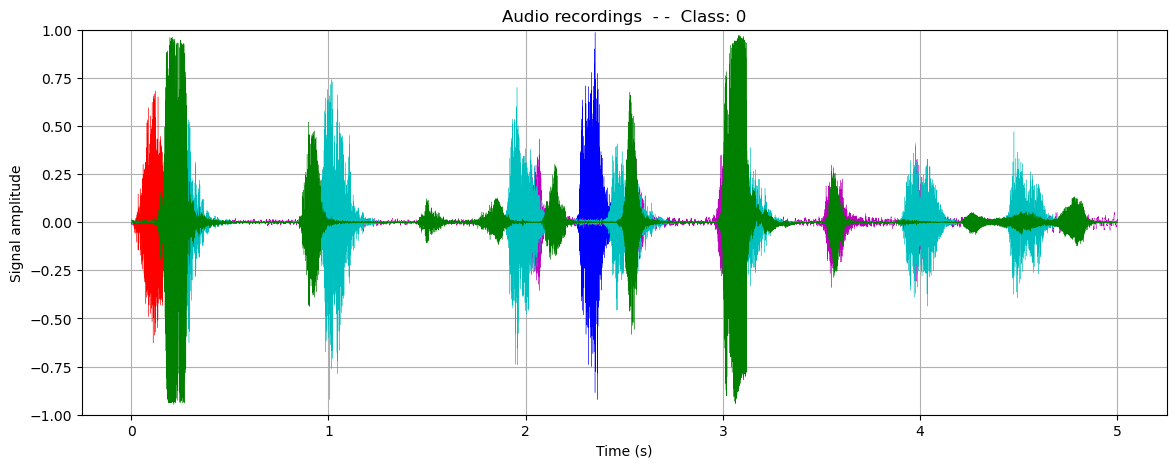

In [18]:
fig=plt.figure(figsize=(14,5))

colors=['b','r','m','c','g','k','y', 'grey', 'c', 'm', 'r' ]
for j in range(5) :

    plt.plot(time_vector, audio_data[j], color=colors[j],linewidth=0.25)


plt.ylim(-1, 1)
plt.xlabel('Time (s)')
plt.ylabel('Signal amplitude')
plt.title('Audio recordings  - -  Class: '+str(labels[j]))
plt.grid()

<span style="color:#4169E1"> In this dog barking audio clips subset [0:5], one audio clip consists of 4.5 s of silence and one 0.5 s dog barking occurence. 
Other audio clips consist of several occurences of the same phenomenon. <br> We will reduce the length of ALL audio clips in all classes to 1.25s. For retaining the clock tick fundamental frequency= 1 Hz.  

#### Plot various audio signals 

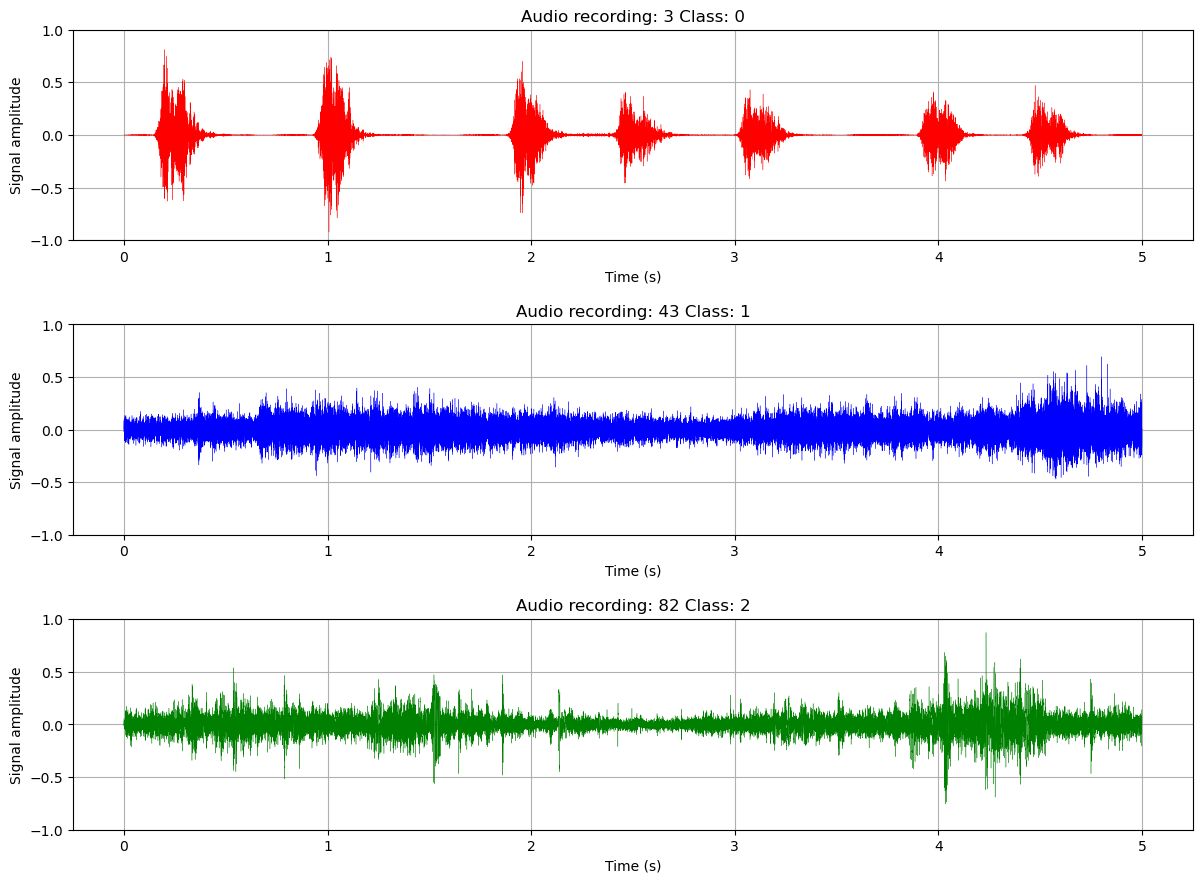

In [19]:
fig=plt.figure(figsize=(14,10))


ax = fig.add_subplot(3, 1, 1)
#  RGBA tuple  ((0,1,0,1))    Alpha is ytransparecy from 0 to 1   
plt.plot(time_vector,audio_data[ind[0]][0:len(time_vector)],'r',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[0])+' Class: '+str(labels[ind[0]]))
ax.grid()
#plt.show()

ax = fig.add_subplot(3, 1, 2)
#  RGBA tuple  ((0,1,0,1))    Alpha is ytransparecy from 0 to 1   
plt.plot(time_vector,audio_data[ind[1]][0:len(time_vector)],'b',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[1])+' Class: '+str(labels[ind[1]]))
ax.grid()
#plt.show()

ax = fig.add_subplot(3, 1, 3)
#  RGBA tuple  ((0,1,0,1))    Alpha is ytransparecy from 0 to 1   
plt.plot(time_vector,audio_data[ind[2]][0:len(time_vector)],'g',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[2])+' Class: '+str(labels[ind[2]]))
ax.grid()

# set the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

### Reducing the size of audio signals 

<span style="color:#4169E1"> We split all audio clips in 1.25 s frames. With overlap (step= st). And we select the frame with the highest power for each audio clip. <br>
    <b>Note:</b> the dot product frames[i]\*frames[i].T is proportional to the audio signal power. 

In [20]:
from scipy import signal
from skimage import util

In [21]:
sub_sequence= fs*1.25    #  1.25 seconds of signal ! 
st=400 #  samples for sliding the window ith overlap  
audio_data_red = []

print('running...   ')
print('  ')
reduc_audio_start= time.time() 

for i in range (0,num_audiorec):
    if i%99 == 0:
        print(i)
        
    frames = util.view_as_windows(audio_data[i], window_shape=(sub_sequence,), step=st) 
    optim_frame_index= np.dot(frames,frames.T).diagonal().argmax()     
        
    audio_data_red.append(frames[optim_frame_index]/np.max(frames[optim_frame_index]))   

reduc_audio_end= time.time()   
print('  ')
print(f'Audio clip size reduction computing time (s) {reduc_audio_end - reduc_audio_start:.2f}')

running...   
  
0
99
198
297
396
  
Audio clip size reduction computing time (s) 12.35


In [22]:
np.shape(frames), np.shape(audio_data_red)
time_red=len(audio_data_red[0])
time_red

27562

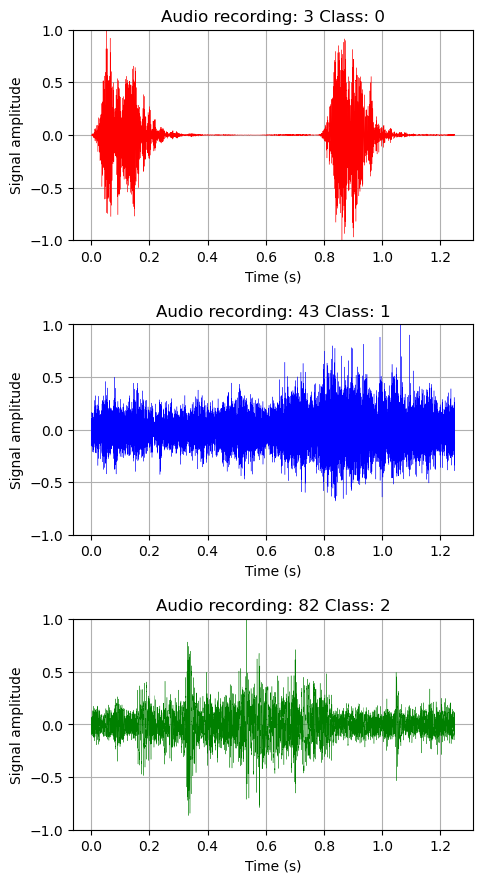

In [23]:
#save_path='dog_time.jpg'
fig=plt.figure(figsize=(5,10))
#plt.title('Figure 8 Torus')

ax = fig.add_subplot(3, 1, 1)
#  RGBA tuple  ((0,1,0,1))    Alpha is transparency from 0 to 1   
plt.plot(np.arange(time_red)/fs,audio_data_red[ind[0]][0:time_red],'r',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[0])+' Class: '+str(labels[ind[0]]))
ax.grid()
#plt.show()

ax = fig.add_subplot(3, 1, 2)
#  RGBA tuple  ((0,1,0,1))    Alpha is ytransparecy from 0 to 1   
plt.plot(np.arange(time_red)/fs,audio_data_red[ind[1]][0:time_red],'b',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[1])+' Class: '+str(labels[ind[1]]))
ax.grid()
#plt.show()


ax = fig.add_subplot(3, 1, 3)
#  RGBA tuple  ((0,1,0,1))    Alpha is ytransparecy from 0 to 1   
plt.plot(np.arange(time_red)/fs,audio_data_red[ind[2]][0:time_red],'g',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[2])+' Class: '+str(labels[ind[2]]))
ax.grid()

# set the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [24]:
time_vector_red=(1/fs)*np.arange(len(audio_data_red[0]))  # time (s) vector 

#### White noise Gaussian, non Gaussian  


<span style="color:#4169E1"> We will not go through all types of sounds. We insist on sound that are hard to discriminate. 
"Rain" and "seawaves". <br> 
In all classification attempts, some "seawave" sound clips (like 116) are confused with "rain". 
    
###### Quick FFT
    
<span style="color:#4169E1"> We select 4 audio clips:  3 "rain", 1 "seawave" (audio clip 116) that is often confused with "rain".   

In [25]:
indloc=[116,48,64,71]

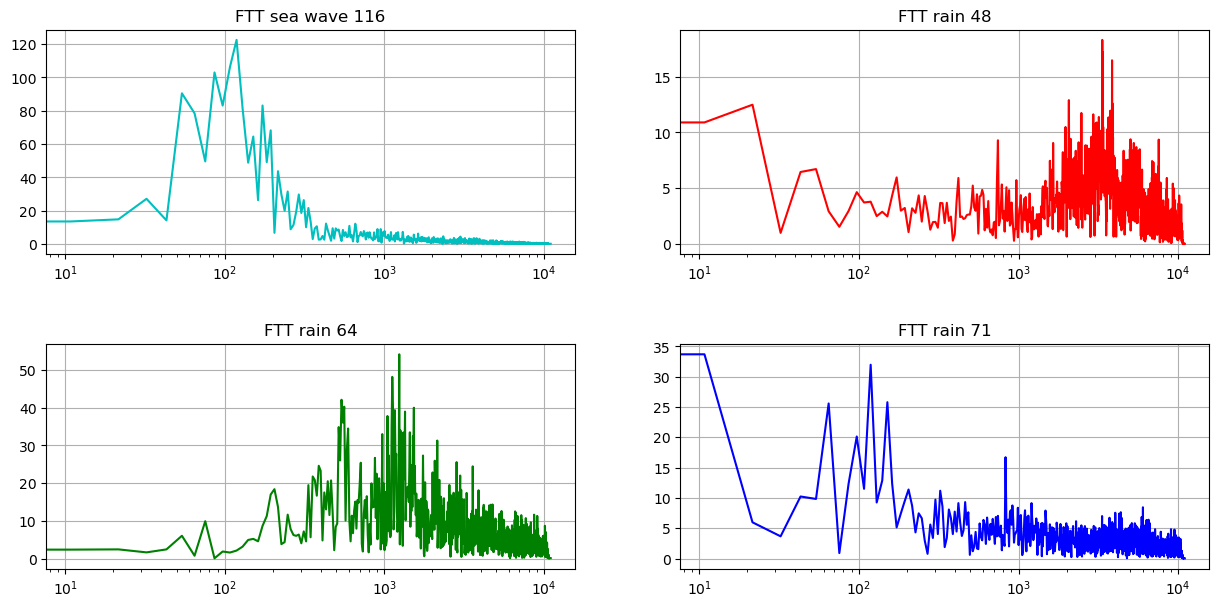

In [26]:
x_sea1= audio_data_red[indloc[0]]
x_rain1= audio_data_red[indloc[1]]
x_rain2= audio_data_red[indloc[2]]
x_rain3= audio_data_red[indloc[3]]

nfft=1024*2;

X_sea1= np.fft.fft(x_sea1, nfft)
X_rain1= np.fft.fft(x_rain1, nfft)
X_rain2= np.fft.fft(x_rain2, nfft)
X_rain3= np.fft.fft(x_rain3, nfft)

afr=np.arange(0,fs/2, fs/nfft)

fig=plt.figure(figsize=(15,7))
plt.subplots_adjust(hspace=0.4) 
ax = fig.add_subplot(221)    
ax.semilogx(afr, np.abs(X_sea1[0:nfft//2]),'c')
ax.set_title("FTT sea wave "+str(indloc[0]))
ax.grid()
#----------
ax = fig.add_subplot(222)    
plt.semilogx(afr, np.abs(X_rain1[0:nfft//2]),'r')
ax.set_title("FTT rain "+str(indloc[1]))
ax.grid()
#----------
ax = fig.add_subplot(223)        
plt.semilogx(afr, np.abs(X_rain2[0:nfft//2]),'g')
ax.set_title("FTT rain "+str(indloc[2]))
ax.grid()
#----------
ax = fig.add_subplot(224)        
plt.semilogx(afr, np.abs(X_rain3[0:nfft//2]),'b')
ax.set_title("FTT rain "+str(indloc[3]))
ax.grid()

<span style="color:#4169E1">

The FFT does not say much. Low frequency content in sea waves, although some rain sound clips show rich low frequency content as well. 
Hence the interest of a different criteria. 

##### Histogram - Shape of Probability Density Function.  
<br>

<span style="color:#4169E1">
We plot the Probability Density Function of the four sound clips. And we fit a Gaussian PDF on all of them after computing the mean $\mu$ and the standard deviation $\sigma$. 

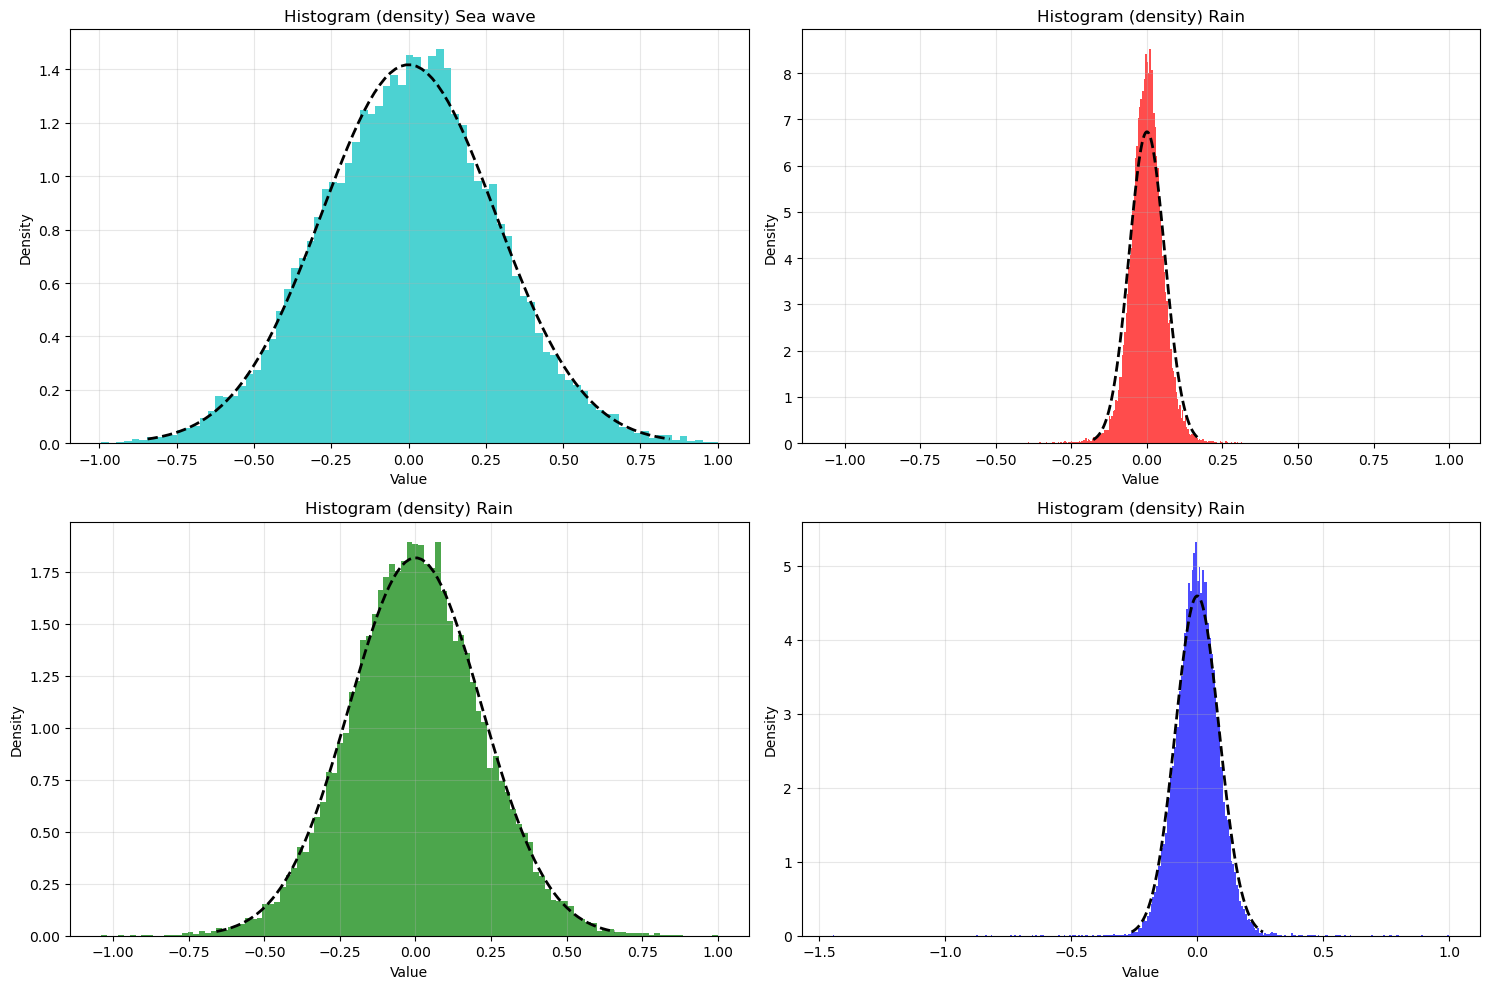

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

np.random.seed(100)

def fit_and_plot_normal(data, color, title, subplot_pos):
    """
    Fit a normal distribution to the data and plot the histogram along with the fitted curve.
    
    :param data: The data to fit and plot
    :param color: Color for the histogram
    :param title: Title for the subplot
    :param subplot_pos: Position in the subplot grid
    :return: Fitted parameters (mean, std)
    """
    # Fit a normal distribution to data
    mu, std = stats.norm.fit(data)
    
    # Generate x values for the normal curve
    x = np.linspace(mu - 3*std, mu + 3*std, 100)
    y = stats.norm.pdf(x, mu, std)
    
    # Plotting
    ax = plt.subplot(2, 2, subplot_pos)
    ax.hist(data, bins='auto', density=True, color=color, alpha=0.7)
    ax.plot(x, y, 'k--', linewidth=2)
    ax.set_title(f"Histogram (density) {title}")
    ax.grid(True, alpha=0.3)
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    
    return mu, std

# Assuming x_sea1, x_rain1, x_rain2, x_rain3 are defined elsewhere
data_sources = [
    (x_sea1, 'Sea wave', 'c', 0),
    (x_rain1, 'Rain', 'r', 1),
    (x_rain2, 'Rain', 'g', 2),
    (x_rain3, 'Rain', 'b', 3)
]

# Create a figure with a larger size
plt.figure(figsize=(15, 10))

# Loop through each dataset and plot
for data, title, color, subplot_pos in data_sources:
    fit_and_plot_normal(data, color, title, subplot_pos + 1)

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

<span style="color:#4169E1">
    
Both phenomena are stationary, close to Gaussian white noise actually. <br>
In practice, a CWT is not the best tool to analyse or classify this type of signal. This is the reason why we developped the transform <i>aT-CWT</i> mentionned in the Result section. <br>
Nevertheless the CWTs offer a different perspective compared with the Mel-spectrogram used as a feature. That helps with the whole classification process.   

## Wavelet Transforms 

<span style="color:#4169E1"> 
    
At the moment we are experimenting wavelets selection.   <br><br>  
We found that the following complex wavelets couple is a good compromise in terms of classification accuracy: <br>  
- <b>'cmorl1.5-1'</b> will be the default, applied to <b> class A </b>: "Harmonic sounds" <br>
- <b>'cgau5' to "cgau8'</b> are doing a good job with sounds in <b> class B </b>: non-harmonics, "sea waves", "rain",... <br>
    
Other couples of complex wavelets work too. We may add examples in the future. 

- Class = 01-Dogbark, Label = 0
- Class = 02-Rain, Label = 1
- Class = 03-Seawaves, Label = 2
- Class = 04-Babycry, Label = 3
- Class = 05-Clocktick, Label = 4
- Class = 06-Personsneeze, Label = 5
- Class = 07-Helicopter, Label = 6
- Class = 08-Chainsaw, Label = 7
- Class = 09-Rooster, Label = 8
- Class = 10-Firecrackling, Label = 9

In [29]:
wavlist = pywt.wavelist(kind='continuous')
print('Continuous wavelets:', wavlist)
print('Continuous wavelets set includes real and complex wavelets')

Continuous wavelets: ['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']
Continuous wavelets set includes real and complex wavelets


In [30]:
import numpy as np
import pywt
dt = time_vector_red[1] - time_vector_red[0]
frequences = pywt.scale2frequency('cmor1.5-1.0', [1,129]) / dt
frequences

array([22050.        ,   170.93023256])

#### Selecting Wavelets 

In [38]:
def plot_wavelets_pywav(typ_wavlt, scales, dt , lev ) :
    

    """
    Plots complex wavelets and returns wavelet data.

    Parameters:
    - typ_wavlt (str): Type of wavelet.
    - scales (array-like): Wavelet scales.
    - dt (float): Sampling period in seconds (dt = 1/fs).
    - lev (int): Wavelet decomposition level, determining the number of points (2^lev).

    Returns:
    - tuple: (psi, frequences) where:
        - psi is the wavelet function.
        - frequences are the corresponding frequencies for given scales.

    The function plots:
    1. Real and imaginary parts of the wavelet.
    2. Magnitude and phase of the wavelet.
    3. Frequencies versus scales.
    """
    # wavelet support frozen at this time. 
    xlm=-7.5
    xlp=7.5

    fig=plt.figure(figsize=(15,3))
    plt.subplots_adjust(#left=0.1, bottom=0.1, right=0.9, top=0.9,
                    wspace=0.5,
                    hspace=0.5)

    [psi, x] = pywt.ContinuousWavelet(typ_wavlt).wavefun(lev)
    frequences = pywt.scale2frequency(typ_wavlt, scales) / dt    
    ax = fig.add_subplot(131)    
    line1, =ax.plot(x, np.real(psi), color='b',label="real" )
    line2, = ax.plot(x, np.imag(psi), color='r',label="imag" )
    ax.legend(handles=[line1,line2], loc='upper right')
    ax.grid()
    plt.xlim(xlm, xlp)
    ax.set(title= typ_wavlt)
    ax.set_xlabel('time')
    ax.set_ylabel('amplitude')
    ax = fig.add_subplot(132)    
    color = 'tab:orange'
    ax.plot(x, np.abs(psi),  label="magnitude", color=color)
    #ax.plot(x, np.unwrap(np.angle(psi)), label="phas", color=color)
    ax.tick_params(axis='y', labelcolor=color)    
    ax.grid()
    plt.xlim(xlm, xlp)
    ax.set(title='magnitude + phase '+typ_wavlt)
    ax.set_xlabel('time')
    #ax.set_ylabel('magnitude')
    ax.set_ylabel('magnitude', color=color)  # we already handled the x-label with ax1
    ax2 = ax.twinx()  # instantiate a second Axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('rad', color=color)  # we already handled the x-label with ax1
    ax2.plot(x, np.unwrap(np.angle(psi)), label="phas", color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax = fig.add_subplot(133)      
    ax.semilogy(scales, frequences, '.', label="phas", color='k')  #, marker='.') 
    ax.grid(which='both', axis='both',)
    ax.set(title='frequencies '+typ_wavlt)
    ax.set_xlabel('scale')
    ax.set_ylabel('frequency (Hz)')
    return psi, frequences   

In [39]:
#lev=4   # 2^4 16 points
#lev=5   # 2^5 32 points
lev=8    # 2^8= 256  points 
scales=range(1,129)  # 128 scales
typ_wavlt='cmor1.5-1'
dt = time_vector_red[1] - time_vector_red[0]

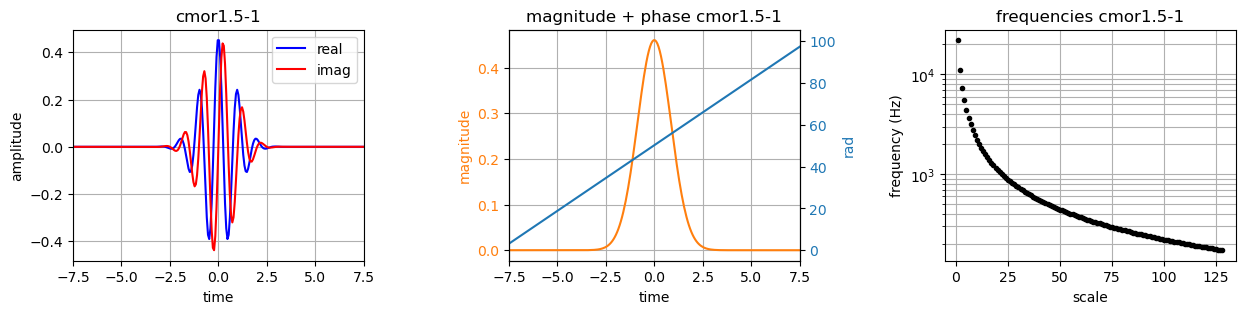

In [40]:
psi,x = plot_wavelets_pywav(typ_wavlt, scales, dt ,lev  )

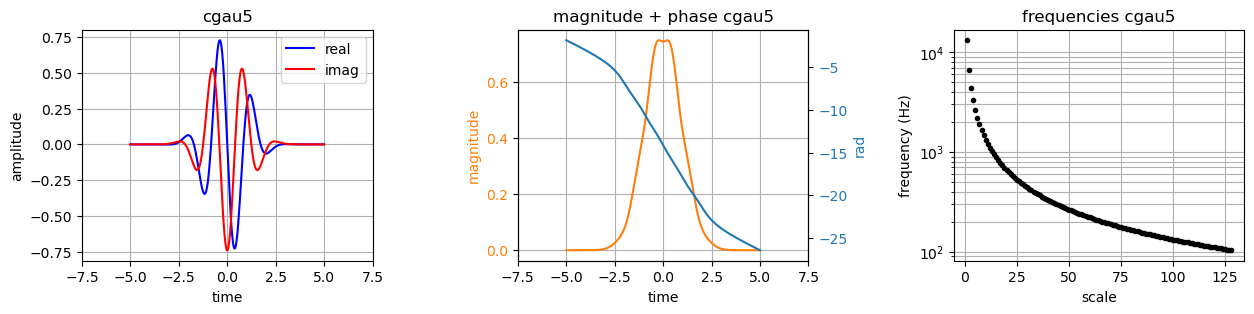

In [41]:
typ_wavlt='cgau5'
psi,x = plot_wavelets_pywav(typ_wavlt, scales, dt ,lev  )

##### Computing complex wavelets transforms 

<br>

<span style="color:#4169E1"> 

We compute the complex wavelet transform for 1 sound clip selected at random in each class. 

In [42]:
waveletname='cmor1.5-1.0' # complex

wavelet_mat_mag=[]
wavelet_mat_phas=[]
scales = range(1,129)
dt = time_vector_red[1] - time_vector_red[0]

ind=[3, 43, 82, 116, 165, 208, 245, 284, 326, 365 ]  # select audio clips in each class ! 
lw=-1

for i in ind:
    lw+=1
 
    if lw==1 or lw==2  or lw==9 :    #  subclass "No Harmonics" ! 
        waveletname='cgau5'
        
    [coefficients, frequencies] = pywt.cwt(audio_data_red[i],scales, waveletname, dt)

    scal_mag=20*np.log10(abs(coefficients) + 1e-12)

    scal_phas=np.unwrap(np.angle(coefficients))

    wavelet_mat_mag.append(scal_mag) 
    wavelet_mat_phas.append(scal_phas) 

    waveletname='cmor1.5-1.0' #  back to default wavelet 


wavelet_mat_mag=np.array( wavelet_mat_mag)
wavelet_mat_phas=np.array( wavelet_mat_phas)

##### Under sampling CWT in the time domain

Target: 128x128 scalograms 

In [43]:
step_time=216                                   # for time dimension = 128 
sub_time=time_vector_red[0:time_red:step_time]  # We reduce the size of the time vector !  We will lose details on scalograms ! 
                                                # The step, here 100 depends on fs. st=100 means we downsample time every:  100/fs  second. If fs=44.1 kHz: 2.2 ms   

In [44]:
np.shape(wavelet_mat_mag),  np.shape(sub_time)

((10, 128, 27562), (128,))

##### Plot CWTs of selected audio clips: Magnitude and Phase

<br>

<span style="color:#4169E1"> 

We will plot <i>time \; x \; scales</i> hotmaps. This can be changed by converting scales to frequencies.       
<b>Note</b>: <br> 
Be careful, sound/noise high frequency content is <b> at the bottom </b> of each CWT hotmap.  
- scale number    1: Highest Frequency, generally close to fs/2=11025 Hz or fs= 22050 Hz* in this notebook, is at the bottom  <br>
- scale number 128: Lowest frequency, around or under 100 Hz, is at the top!  
    
*depending on how the wavelet parameters were adjusted, for example: 
- <b>cmor#-1</b> scale 1 frequency= fs
- <b>cmor#-0.5</b> scale 1 frequency= fs/2
    

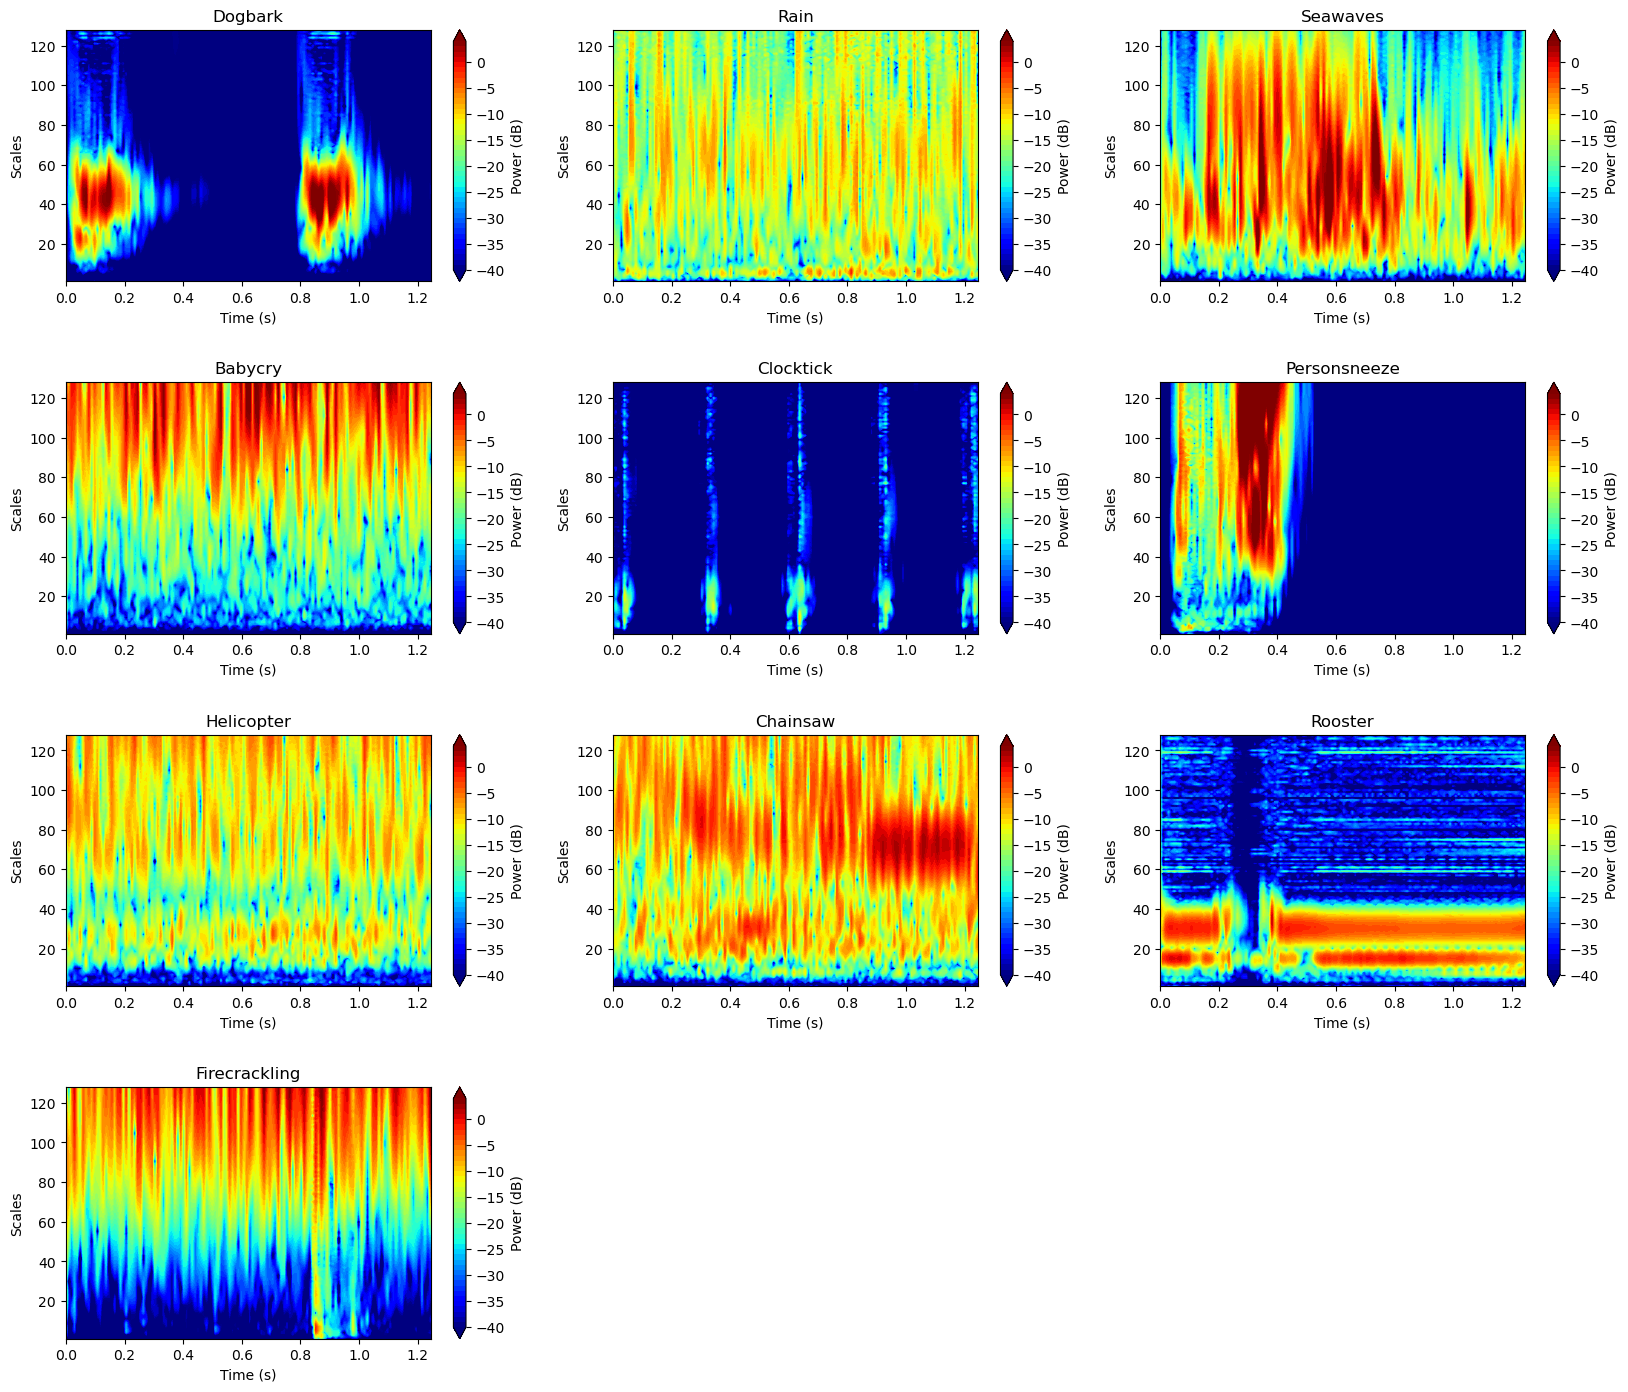

In [45]:
list_soundtype=['Dogbark', 'Rain', 'Seawaves', 'Babycry',  'Clocktick', 'Personsneeze',\
                                             'Helicopter', 'Chainsaw',  'Rooster',  'Firecrackling' ]        

period = 1. / frequencies

contourlevels = np.arange(-40,5,1)
cmap= 'jet'
#-----------------
fig=plt.figure(figsize=(20,17))
plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    #wspace=0.5,
                    hspace=0.4)

for ii in range(3) :
    for jj in range(3) :
        k=3*ii + jj
        
        ax = fig.add_subplot(4, 3, k+1)
        img= ax.contourf(sub_time, scales,\
                         #np.log2(wavelet_mat[k,:,0:time_red:step_time]+1e-12),\
                         wavelet_mat_mag[k,:,0:time_red:step_time],

                         contourlevels, 
                         extend='both', 
                         cmap=cmap) 
        
        #fig.colorbar(img, ax=ax, format='%+2.0f Mag^(0.5)')
        cbar=fig.colorbar(img, ax=ax)
        cbar.set_label('Power (dB)')
        ax.set(title=list_soundtype[k])
        ax.set_xlabel('Time (s)')
        #ax.set_ylabel('Period')
        #ax.set_ylabel('Frequencies')
        ax.set_ylabel('Scales')

ax = fig.add_subplot(4, 3, 10)
img = ax.contourf(sub_time, scales, 
                  #np.log2(wavelet_mat[9,:,0:time_red:step_time]+1e-12),\
                  wavelet_mat_mag[9,:,0:time_red:step_time],

                  contourlevels, 
                  extend='both',cmap=cmap)
#cbar=fig.colorbar(img, ax=ax, format='%+2.0f)
cbar=fig.colorbar(img, ax=ax)
cbar.set_label('Power (dB)')
ax.set(title=list_soundtype[9])
ax.set_xlabel('Time (s)')
#ax.set_ylabel('Period')
#ax.set_ylabel('Frequencies')
ax.set_ylabel('Scales')

plt.show()


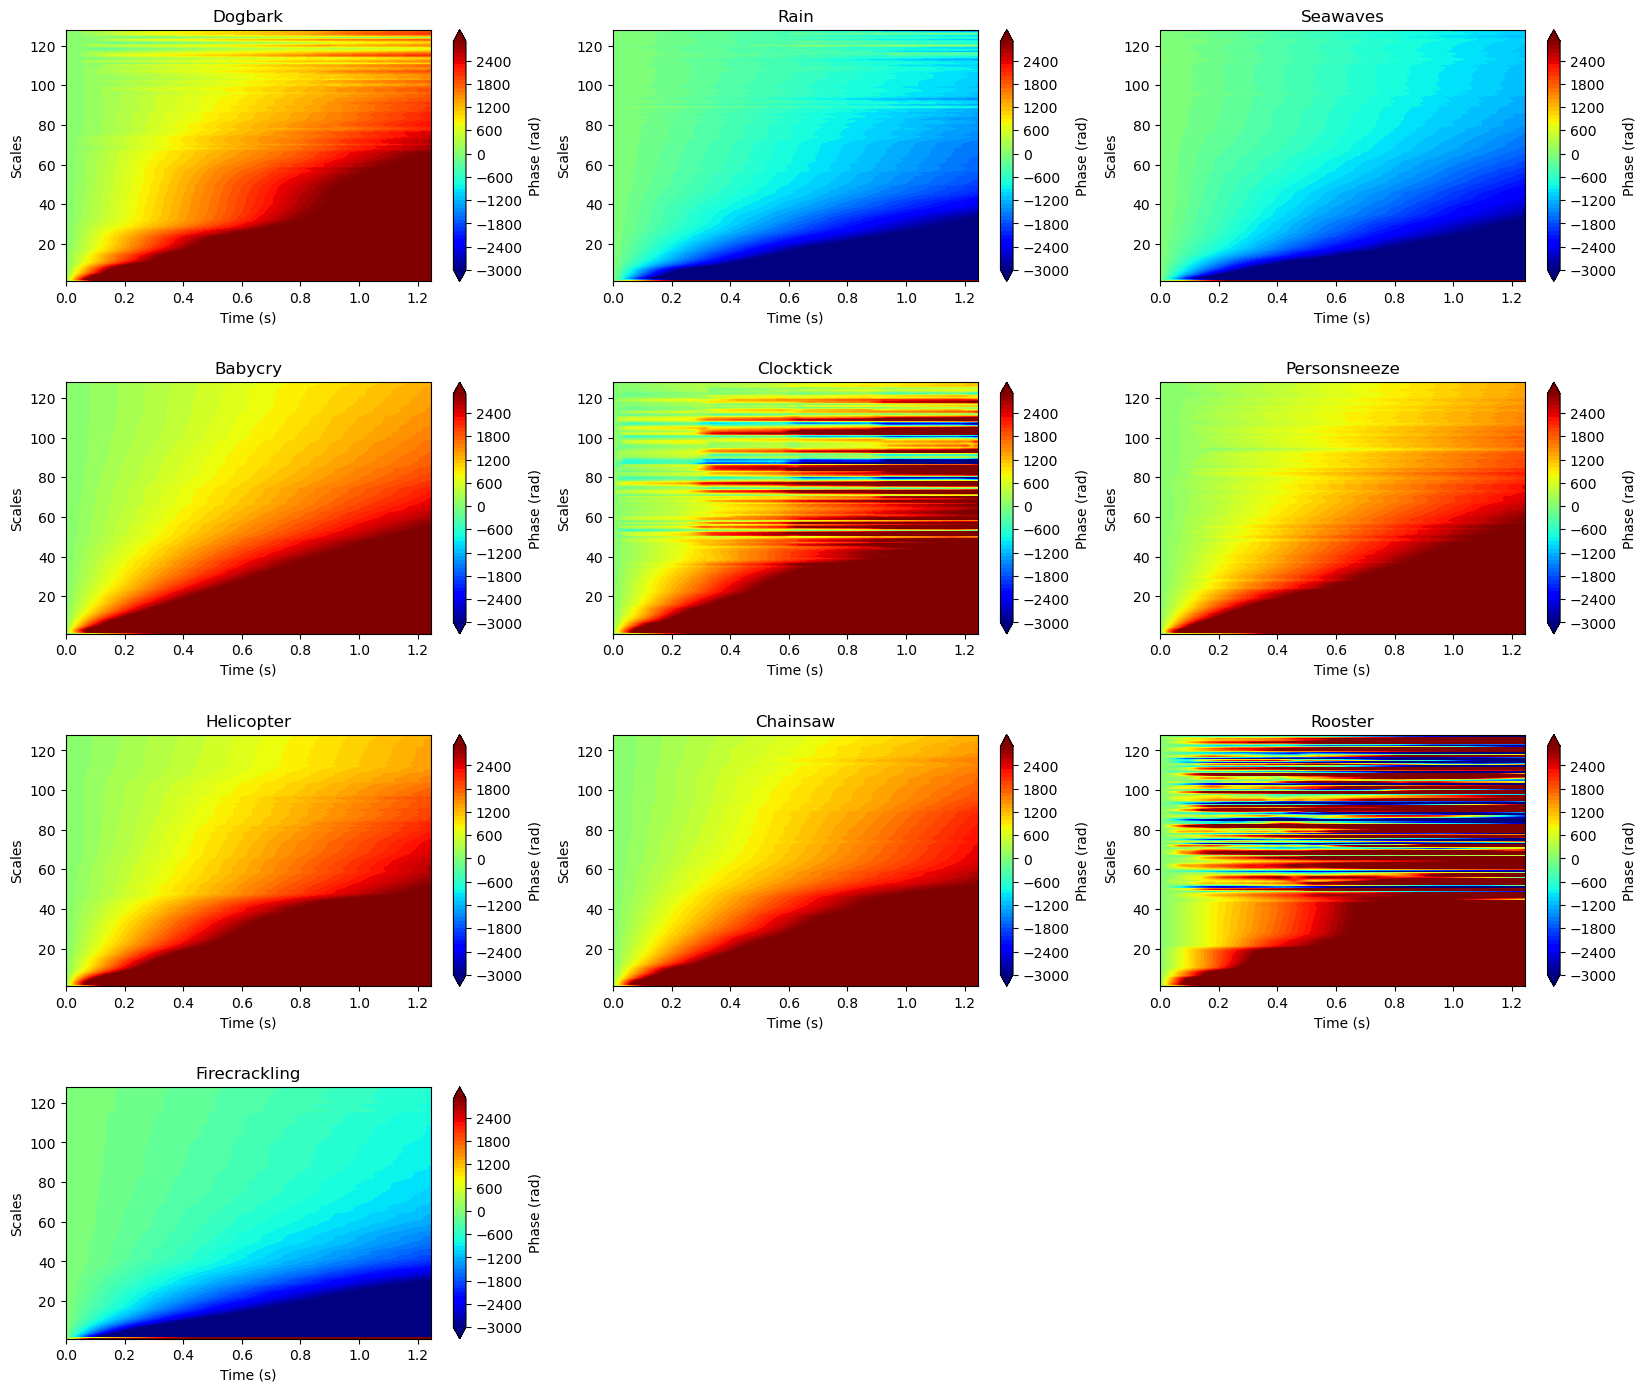

In [46]:
list_soundtype=['Dogbark', 'Rain', 'Seawaves', 'Babycry',  'Clocktick', 'Personsneeze',\
                                             'Helicopter', 'Chainsaw',  'Rooster',  'Firecrackling' ]        

period = 1. / frequencies
#contourlevels = np.arange(-25,9,1)
contourlevels = np.arange(-3000,3000,100)
cmap= 'jet'
#-----------------
fig=plt.figure(figsize=(20,17))
plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    #wspace=0.5,
                    hspace=0.4)

for ii in range(3) :
    for jj in range(3) :
        k=3*ii + jj
        
        ax = fig.add_subplot(4, 3, k+1)
        img= ax.contourf(sub_time, scales,\
                         #np.log2(wavelet_mat[k,:,0:time_red:step_time]+1e-12),\
                         wavelet_mat_phas[k,:,0:time_red:step_time],

                         contourlevels, 
                         extend='both', 
                         cmap=cmap) 
        
        #fig.colorbar(img, ax=ax, format='%+2.0f Mag^(0.5)')
        cbar=fig.colorbar(img, ax=ax)
        cbar.set_label('Phase (rad)')
        ax.set(title=list_soundtype[k])
        ax.set_xlabel('Time (s)')
        #ax.set_ylabel('Period')
        #ax.set_ylabel('Frequencies')
        ax.set_ylabel('Scales')

ax = fig.add_subplot(4, 3, 10)
img = ax.contourf(sub_time, scales, 
                  #np.log2(wavelet_mat[9,:,0:time_red:step_time]+1e-12),\
                  wavelet_mat_phas[9,:,0:time_red:step_time],

                  contourlevels, 
                  extend='both',cmap=cmap)
#cbar=fig.colorbar(img, ax=ax, format='%+2.0f)
cbar=fig.colorbar(img, ax=ax)
cbar.set_label('Phase (rad)')
ax.set(title=list_soundtype[9])
ax.set_xlabel('Time (s)')
#ax.set_ylabel('Period')
#ax.set_ylabel('Frequencies')
ax.set_ylabel('Scales')

plt.show()

<span style="color:#4169E1"> 
    
The convolution of the signal at various instants with 128 scales complex wavelets, provides magnitude and phase scalograms. The CWT is sampled for 128x128 images.   

<b>Important note</b>:  
    
The complexity of the phase between [-pi,pi] is in general not well suited for classification problems. We plotted the CWT unwrapped phase here. The phase can be unwrapped in two directions.

- Unwrapping the phase across the scales axis somewhat follows the magnitude patterns. Although we can see a clear phase change where the steps occur. 
- Unwrapping the phase across the time axis, creates horizontal "traces", that are particulalry visible for strong non-stationary phenomena. And it offers a different perspective for characterizing the phase, which proved very useful in classification problems. 
    
    
Therefore, for adding a distinctive feature, we have unwrapped the phase across the time axis. 

<span style="color:#4169E1"> We create wavelet transforms for the 400 audio clips. <br>

In [47]:
print('running...   ')
print('  ')

waveletname='cmor1.5-1.0' # complex
cwt_audio_start= time.time()   

data_cwt_mag= np.ndarray(shape=(len(audio_data_red), len(scales), len(sub_time)))
data_cwt_phas= np.ndarray(shape=(len(audio_data_red), len(scales), len(sub_time)))

for ii in range(0,len(audio_data_red)):

    if ii % 99 == 0:
        print(ii)
    

    if labels[ii]==1 or labels[ii]==2 or labels[ii]==9 : 
        waveletname='cgau5'

    
    [coefficients, frequencies] = pywt.cwt(audio_data_red[ii], scales, waveletname, dt) 
    
    scal_mag=20*np.log10(abs(coefficients) + 1e-12)
    scal_mag = np.clip(scal_mag, -40, 5)
    
    scal_phas=np.unwrap(np.angle(coefficients))
    scal_phas = np.clip(scal_phas, -3000, 3000)
    
    data_cwt_mag[ii,:,:] = scal_mag[:,0:time_red:step_time]   # reduction of Data ! 
    data_cwt_phas[ii,:,:] = scal_phas[:,0:time_red:step_time]   # reduction of Data ! 
    #-----------------
    #waveletname='morl'
    waveletname='cmor1.5-1.0' # complex
  
    
cwt_audio_end= time.time()   
print('  ')
print(f'Wavelet Transform computing time (s) {cwt_audio_end - cwt_audio_start:.2f}')

running...   
  
0
99
198
297
396
  
Wavelet Transform computing time (s) 424.42


In [48]:
np.shape(data_cwt_mag), np.shape(data_cwt_phas), np.shape(audio_data_red)

((400, 128, 128), (400, 128, 128), (400, 27562))

###  Mel-Spectrograms

In [49]:
hp_l= step_time 
n_m = 128
NFFT=1024        # high definition. Remember 1 sec audio signal <--->  fs= 44100 points  or  fs= 22050 points 
trunc_mel= 128   # truncation number of mels filters 

In [50]:
melspec = []

ind=[3, 43, 82, 116, 165, 208, 245, 284, 326, 365 ]

for i in ind:
    #print(i)
    mel_feature = librosa.feature.melspectrogram(y=audio_data_red[i],sr=fs,
                                          n_fft= NFFT, 
                                          hop_length= hp_l, 
                                          win_length= NFFT, 
                                          window='hann', center=True, power=2, pad_mode='constant', n_mels=n_m)
    
    pwr = librosa.power_to_db(mel_feature, ref=1e-3)
    pwr= np.clip(pwr, -10, 40)
    melspec.append(pwr)  

melspec =np.array(melspec)

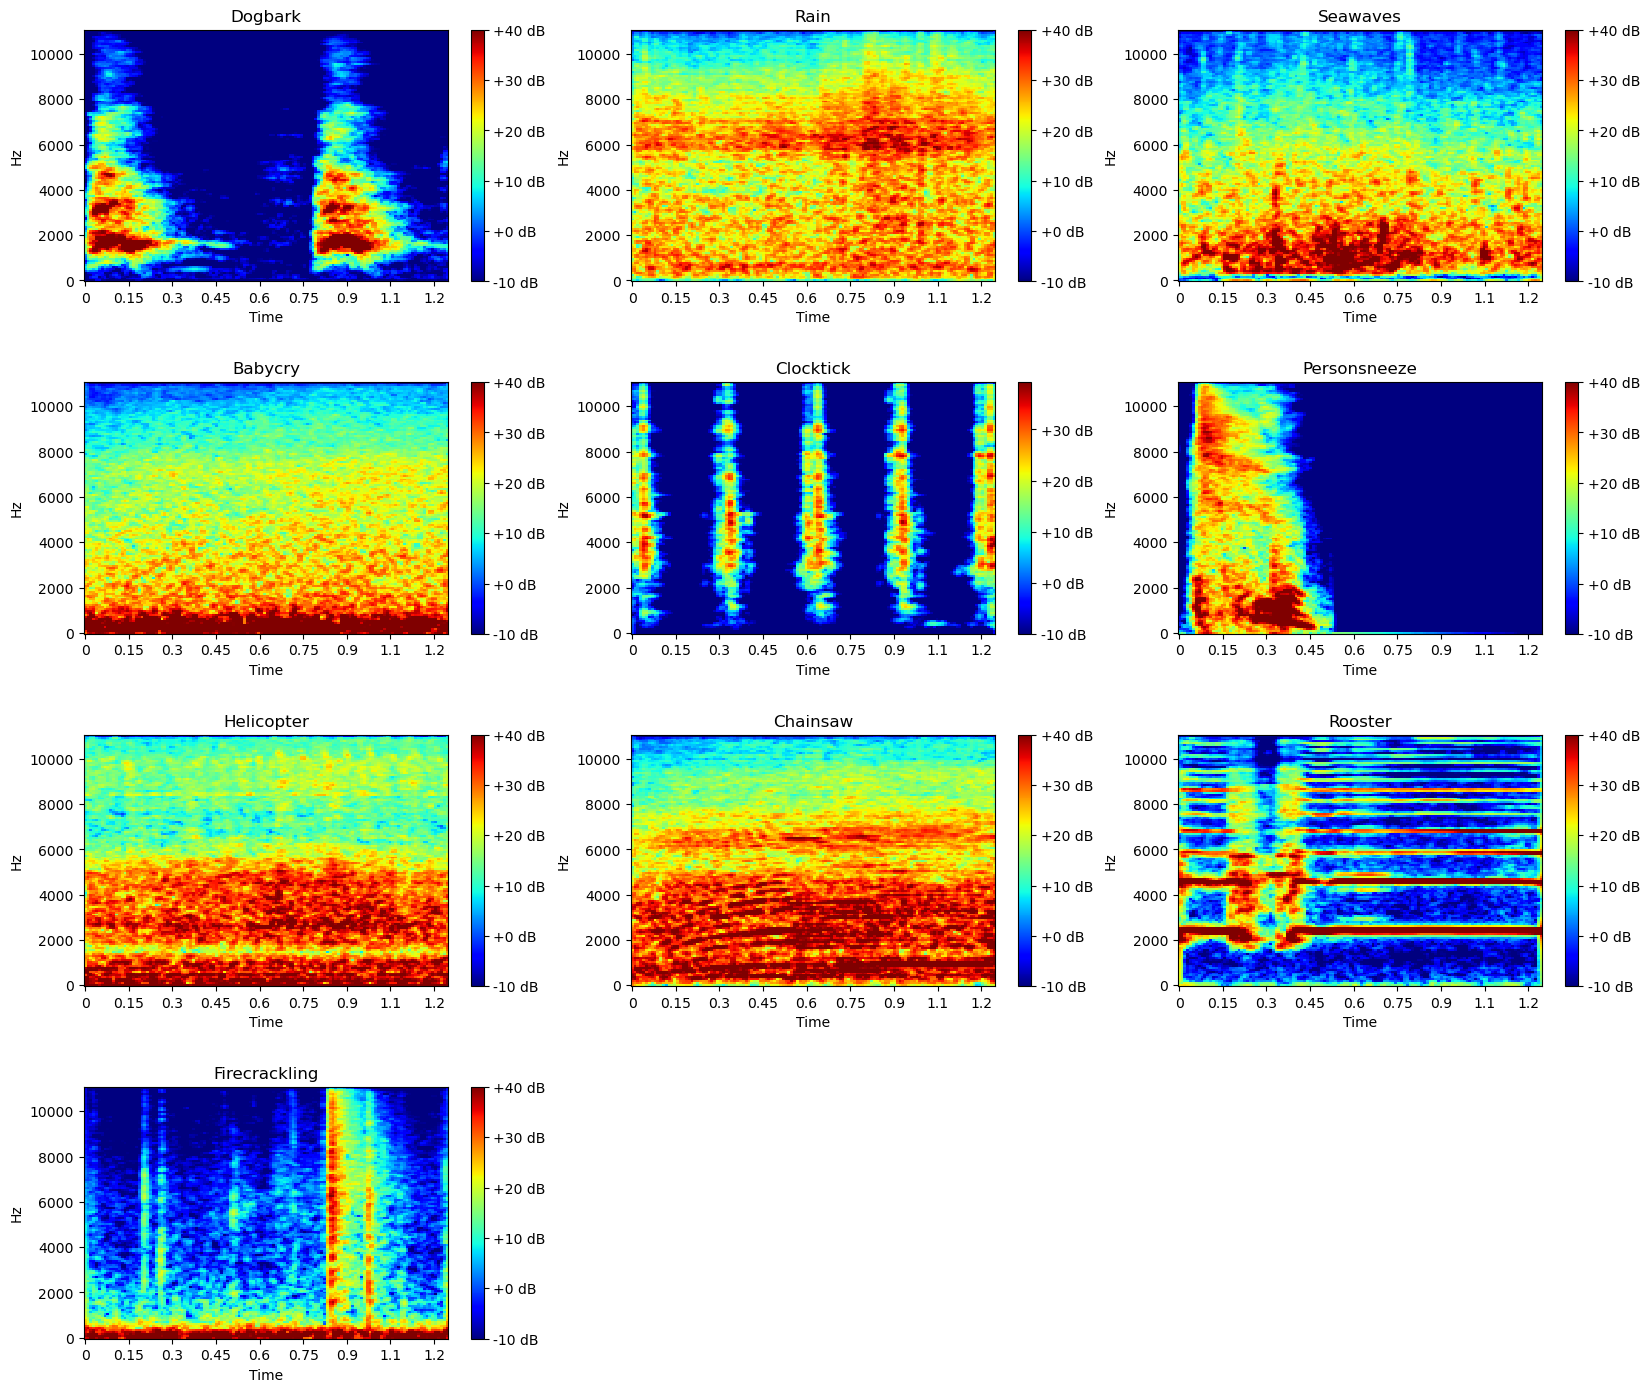

In [51]:
list_soundtype=['Dogbark', 'Rain', 'Seawaves', 'Babycry',  'Clocktick', 'Personsneeze',\
                                             'Helicopter', 'Chainsaw',  'Rooster',  'Firecrackling' ]        

fig=plt.figure(figsize=(20,17))
plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    #wspace=0.5,
                    hspace=0.4)

for ii in range(3) :
    for jj in range(3) :
        k=3*ii + jj
        ax = fig.add_subplot(4, 3, k+1)
        mels_dB=np.array(melspec[k,0:trunc_mel,:])
        img=librosa.display.specshow(mels_dB, y_axis='linear',   hop_length=hp_l, sr=fs,  
                         x_axis='time',  ax=ax, cmap='jet')
        fig.colorbar(img, ax=ax, format='%+2.0f dB')
        #ax.set(title='Mel-frequency spectrogram'+list_soundtype[k])
        ax.set(title=list_soundtype[k])
        
        
ax = fig.add_subplot(4, 3, 10)
mels_dB=np.array(melspec[9,0:trunc_mel,:])
img=librosa.display.specshow(mels_dB, y_axis='linear',   hop_length=hp_l, sr=fs,  
                         x_axis='time',  ax=ax, cmap='jet')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title=list_soundtype[9])

plt.show()

In [52]:
np.shape(mels_dB)

(128, 128)

In [53]:
melspectrogram = []
# All parameters defined already - NO parameter update here !!!  
print('running...   ')
print('  ')
melspec_audio_start= time.time() 

for i in range (0,num_audiorec):
    if i%99 == 0:
        print(i)
    mel_feat = librosa.feature.melspectrogram(y=audio_data_red[i],sr=fs,
                                          n_fft= NFFT, 
                                          hop_length= hp_l, 
                                          win_length= NFFT, 
                                          window='hann', 
                                          center=True, 
                                          power=2, pad_mode='constant', n_mels=n_m)
    
    mel_feat=mel_feat[0:trunc_mel,:]  # Truncation number of mel filters 
    pwr = librosa.power_to_db(mel_feat, ref=1e-3)
    melspectrogram.append(pwr)  

melspectrogram =np.array(melspectrogram) 


melspec_audio_end= time.time()   
print('  ')
print(f'mel-spectrum audio computing time (s) {melspec_audio_end - melspec_audio_start:.2f}') 

running...   
  
0
99
198
297
396
  
mel-spectrum audio computing time (s) 2.21


In [54]:
melspectrogram.shape

(400, 128, 128)

# Scaling - Normalization

<span style="color:#4169E1">  We represent scalograms as 400 vectors for <b>scaling/normalization</b>. 
We will reshape the 400 vectors into 400 "image" matrices (n_scales,-1) for Deep Learning. 
For CNN, the standard normalizer seems to work better than the minmaxscaler. To be confirmed.  

In [55]:
# Normalization type I: [0,1]

In [56]:
# Normalization type II - Works better ! 

In [57]:
from sklearn import preprocessing
#-----------------------------------------------------------------------
data_cwt_mag_vec=data_cwt_mag.reshape(num_audiorec,-1)
data_cwt_phas_vec=data_cwt_phas.reshape(num_audiorec,-1)
#------------------------------------------------------------------------
transform = preprocessing.StandardScaler()
#------------------------------------------------------------------------
normalized_data_cwt_mag_vec= transform.fit_transform(data_cwt_mag_vec)
normalized_data_cwt_phas_vec= transform.fit_transform(data_cwt_phas_vec)

In [58]:
melspectro=melspectrogram.reshape(num_audiorec,-1)
transform = preprocessing.StandardScaler()
normalized_melspectro= transform.fit_transform(melspectro)

In [59]:
 np.min(data_cwt_mag_vec), np.max(data_cwt_mag_vec), np.min(data_cwt_phas_vec), np.max(data_cwt_phas_vec)

(-40.0, 5.0, -3000.0, 3000.0)

In [60]:
np.min(normalized_data_cwt_mag_vec), np.max(normalized_data_cwt_mag_vec), np.min(normalized_data_cwt_phas_vec), np.max(normalized_data_cwt_phas_vec)

(-1.599134173715661,
 7.660431198341574,
 -11.313005658694781,
 12.117612771200145)

In [61]:
np.min(normalized_melspectro), np.max(normalized_melspectro)

(-3.5741005, 3.1908422)

In [62]:
data_cwt_global = np.ndarray(shape=(num_audiorec, len(scales)*np.shape(data_cwt_mag)[2], 3))  # tensor order 3
 
for ii in range(0,num_audiorec):
    if ii % 99 == 0:
        print(ii)

    data_cwt_global[ii,:,0]= normalized_data_cwt_mag_vec[ii,:]
    data_cwt_global[ii,:,1]= normalized_data_cwt_phas_vec[ii,:]
    data_cwt_global[ii,:,2]= normalized_melspectro[ii,:]
   # 

0
99
198
297
396


In [63]:
labels=np.array(labels,dtype=int)

## Convolutional Neural Network 

<span style="color:#4169E1"> 
Normalized Scalograms Magnitude+Phase + Melspectrograms must be 2D-arrays (matrices). <br> 
We reshape accordingly after normalization. 3 layers. 

In [64]:
features_cwt_CNN = np.reshape(data_cwt_global,(-1,len(scales), np.shape(data_cwt_mag)[2],3))
features_cwt_CNN.shape

(400, 128, 128, 3)

In [65]:
# audio clips indices... 
ind=[3, 43, 116, 122, 165, 208, 245, 284, 326, 365 ]

list_sound=['DogBark', 'Rain', 'SeaWaves', 'BabyCry',  'ClockTick', 'PersonSneeze',\
                                             'Helico', 'Chainsaw',  'Rooster',  'FireCrackling' ] 

Text(0.5, 1.0, 'SeaWaves - MelSpectrogram')

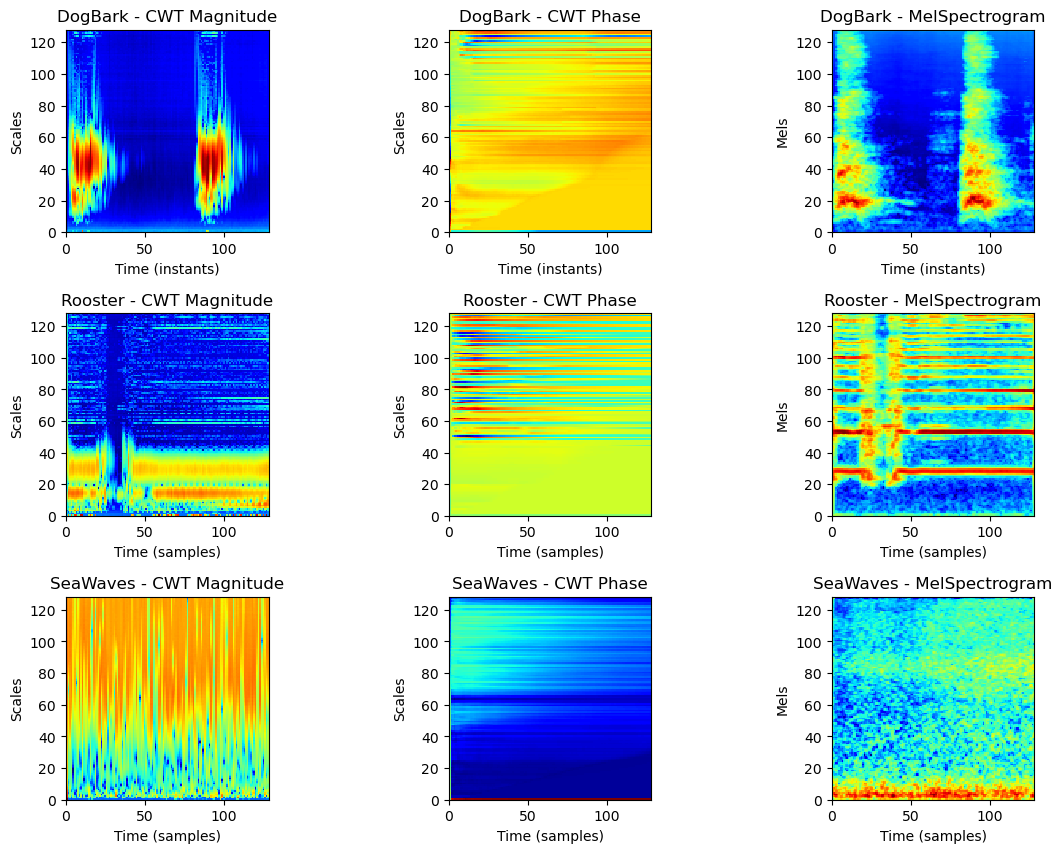

In [66]:
cma='gray'
cma='jet'

fig=plt.figure(figsize=(14,10))

plt.subplots_adjust(#left=0.1,
                    hspace=0.4)

ax = fig.add_subplot(3, 3, 1)
plt.imshow(features_cwt_CNN[ind[0],::-1,:,0] ,cmap=cma,interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
#plt.imshow(features_cwt_CNN[ind[0],:,:,0] ,cmap=cma,interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
ax.set_xlabel('Time (instants)')
ax.set_ylabel('Scales')
ax.set_title(list_sound[np.floor(ind[0]/40).astype('int')]+' - CWT Magnitude')
ax = fig.add_subplot(3, 3, 2)
#---
plt.imshow(features_cwt_CNN[ind[0],::-1,:,1] ,cmap=cma,interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
#plt.imshow(features_cwt_CNN[ind[0],:,:,1] ,cmap=cma,interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])

ax.set_xlabel('Time (instants)')
ax.set_ylabel('Scales')
ax.set_title(list_sound[np.floor(ind[0]/40).astype('int')]+' - CWT Phase')
#---
ax = fig.add_subplot(3, 3, 3)
plt.imshow(features_cwt_CNN[ind[0],::-1,:,2] ,cmap=cma,interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
ax.set_xlabel('Time (instants)')
ax.set_ylabel('Mels')
ax.set_title(list_sound[np.floor(ind[0]/40).astype('int')]+' - MelSpectrogram')
#
#-------
#
ax = fig.add_subplot(3, 3, 4)
plt.imshow(features_cwt_CNN[ind[8],::-1,:,0] ,cmap=cma,interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
ax.set_xlabel('Time (samples)')
ax.set_ylabel('Scales')
ax.set_title(list_sound[np.floor(ind[8]/40).astype('int')]+' - CWT Magnitude')
#---
ax = fig.add_subplot(3, 3, 5)
plt.imshow(features_cwt_CNN[ind[8],::-1,:,1] ,cmap=cma,interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
ax.set_xlabel('Time (samples)')
ax.set_ylabel('Scales')
ax.set_title(list_sound[np.floor(ind[8]/40).astype('int')]+' - CWT Phase')
#---
ax = fig.add_subplot(3, 3, 6)
plt.imshow(features_cwt_CNN[ind[8],::-1,:,2] ,cmap=cma,interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
ax.set_xlabel('Time (samples)')
ax.set_ylabel('Mels')
#ax.set_title('Rooster - Wavelet Transform Phase')
ax.set_title(list_sound[np.floor(ind[8]/40).astype('int')]+' - MelSpectrogram')
#-----
#
ax = fig.add_subplot(3, 3, 7)
plt.imshow(features_cwt_CNN[ind[2],::-1,:,0] ,cmap=cma,interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
ax.set_xlabel('Time (samples)')
ax.set_ylabel('Scales')
ax.set_title(list_sound[np.floor(ind[2]/40).astype('int')]+' - CWT Magnitude')
#----
ax = fig.add_subplot(3, 3, 8)
plt.imshow(features_cwt_CNN[ind[2],::-1,:,1] ,cmap=cma,interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
ax.set_xlabel('Time (samples)')
ax.set_ylabel('Scales')
ax.set_title(list_sound[np.floor(ind[2]/40).astype('int')]+' - CWT Phase')
#----
ax = fig.add_subplot(3, 3, 9)
plt.imshow(features_cwt_CNN[ind[2],::-1,:,2] ,cmap=cma,interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
ax.set_xlabel('Time (samples)')
ax.set_ylabel('Mels')
#ax.set_title('Sea Waves - Wavelet Transform Phase')
ax.set_title(list_sound[np.floor(ind[2]/40).astype('int')]+' - MelSpectrogram')

In [67]:
ylabels=keras.utils.to_categorical(labels, num_classes=10, dtype='float32')

In [68]:
ylabels[41]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

<span style="color:#4169E1"> Train/Test split: 80/20%. <br>
We shuffle the dataset and keep the same <code>random_state</code> for all runs when optimizing CNN parameters <br> And we stratify the sets based on labels. In this case, in both sets, we should have the same number of features/labels in each sound class.     

In [69]:
(train_X,test_X,train_y,test_y)= train_test_split(features_cwt_CNN, ylabels, test_size=0.2, stratify=ylabels, random_state=5)

In [70]:
np.shape(train_X), np.shape(train_y), np.shape(test_X), np.shape(test_y)

((320, 128, 128, 3), (320, 10), (80, 128, 128, 3), (80, 10))

In [71]:
train_X.shape[1:]

(128, 128, 3)

###  Create the Model 

##### <b> CNN Parameters: </b>

<span style="color:#4169E1"> Quick discussion about parameters:

<span style="color:#4169E1">
    
- number of layers: 5 hidden layers.
- number of neurons per layers: generally we go with $2^n$ nodes per increasing number of layer. We started with small numbers and optimized the number of nodes and layers. 32, 64, 128, 256, 256 proved sufficient.   
- "image" matrices are 128x128 grayscale images. Still relatively small. (3,3) filters are sufficient. We let Stride and convolution Dilation rate at default values: (1,1). 
- optimizer: we tested Stochastic Gradient Descent (SGD) and Adam with different parameters. Adam was always superior. AMSGrad option may have further improved convergence.  
- overfitting was an issue initially: drop-out, with probability threshold between 0.1 and 0.2 prevented overfitting while converging close to maximum accuracy. With current implementation no overfitting occurs (hence no drop-out).   
- activation functions: both "ReLU" or "LeakyReLU (alpha:0.1-0.2") work. A slight advantage with ReLU. 

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

def build_cnn_model(input_shape, num_classes):
    """
    Constructs and compiles a Convolutional Neural Network model for image classification.

    This model architecture includes multiple convolutional layers followed by max pooling,
    with increasing depth of feature maps, and ends with fully connected layers and a softmax output.

    :param input_shape: A tuple representing the shape of input data excluding the batch dimension.
    :param num_classes: Number of classes for classification.
    :return: A compiled Keras Sequential model.
    """
    model = Sequential()

    # First Conv Layer
    model.add(Conv2D(32, kernel_size=(3, 3), dilation_rate=(1, 1), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Conv Layer
    model.add(Conv2D(64, kernel_size=(3, 3), dilation_rate=(1, 1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Conv Layer
    model.add(Conv2D(128, kernel_size=(3, 3), dilation_rate=(1, 1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fourth Conv Layer
    model.add(Conv2D(256, kernel_size=(3, 3), dilation_rate=(1, 1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for dense layers
    model.add(Flatten())

    # Dense Layer
    model.add(Dense(800, activation='relu'))

    # Output Layer
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    # Compile the model
    opt = Adam(
        learning_rate=0.0001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-08,
        amsgrad=True
    )
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    return model

In [80]:
model= build_cnn_model(train_X.shape[1:], num_classes)

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 activation_16 (Activation)  (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 activation_17 (Activation)  (None, 61, 61, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                

### Training the model 

In [82]:
accuracy_threshold=0.98

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > accuracy_threshold):   
            print("\nReached %2.2f%% accuracy, we stop training!!" %(accuracy_threshold*100))   
            self.model.stop_training = True

In [83]:
custom_early_stopping = myCallback()

In [84]:
history = model.fit(
    train_X, 
    train_y, 
    epochs=80, 
    steps_per_epoch=len(train_X)//16,
    #validation_split=0.2, 
    validation_data=(test_X, test_y),
    batch_size=10, 
    #verbose=2,
    callbacks=[custom_early_stopping]
)

Epoch 1/80
20/20 [==============================] - 7s 290ms/step - loss: 1.9270 - accuracy: 0.3250 - val_loss: 1.3166 - val_accuracy: 0.5375
Epoch 2/80
20/20 [==============================] - 6s 290ms/step - loss: 1.1096 - accuracy: 0.5850 - val_loss: 0.6495 - val_accuracy: 0.7625
Epoch 3/80
20/20 [==============================] - 6s 305ms/step - loss: 0.6948 - accuracy: 0.7450 - val_loss: 0.6488 - val_accuracy: 0.7125
Epoch 4/80
20/20 [==============================] - 7s 336ms/step - loss: 0.6104 - accuracy: 0.7350 - val_loss: 0.4213 - val_accuracy: 0.8500
Epoch 5/80
20/20 [==============================] - 7s 335ms/step - loss: 0.4457 - accuracy: 0.8150 - val_loss: 0.3490 - val_accuracy: 0.8375
Epoch 6/80
20/20 [==============================] - 7s 342ms/step - loss: 0.3855 - accuracy: 0.8550 - val_loss: 0.3066 - val_accuracy: 0.8875
Epoch 7/80
20/20 [==============================] - 7s 350ms/step - loss: 0.3800 - accuracy: 0.8400 - val_loss: 0.3295 - val_accuracy: 0.8375
Epoch 

In [85]:
test_loss, test_acc = model.evaluate(test_X, test_y) 

3/3 [==============================] - 0s 82ms/step - loss: 0.1467 - accuracy: 0.9875


In [86]:
predictions= model.predict(x=test_X, batch_size=10)

8/8 [==============================] - 0s 34ms/step


In [87]:
predictions=predictions + 1e-09

In [88]:
test_y=test_y+1e-09

In [89]:
list_sound=['DogBark', 'Rain', 'SeaWaves', 'BabyCry',  'ClockTick', 'PersonSneeze',\
                                             'Helico', 'Chainsaw',  'Rooster',  'FireCrackling' ] 

In [90]:
from sklearn.metrics import classification_report
print(classification_report(test_y.argmax(axis=1), predictions.argmax(axis=1), target_names= list_sound))

               precision    recall  f1-score   support

      DogBark       1.00      1.00      1.00         8
         Rain       0.89      1.00      0.94         8
     SeaWaves       1.00      0.88      0.93         8
      BabyCry       1.00      1.00      1.00         8
    ClockTick       1.00      1.00      1.00         8
 PersonSneeze       1.00      1.00      1.00         8
       Helico       1.00      1.00      1.00         8
     Chainsaw       1.00      1.00      1.00         8
      Rooster       1.00      1.00      1.00         8
FireCrackling       1.00      1.00      1.00         8

     accuracy                           0.99        80
    macro avg       0.99      0.99      0.99        80
 weighted avg       0.99      0.99      0.99        80



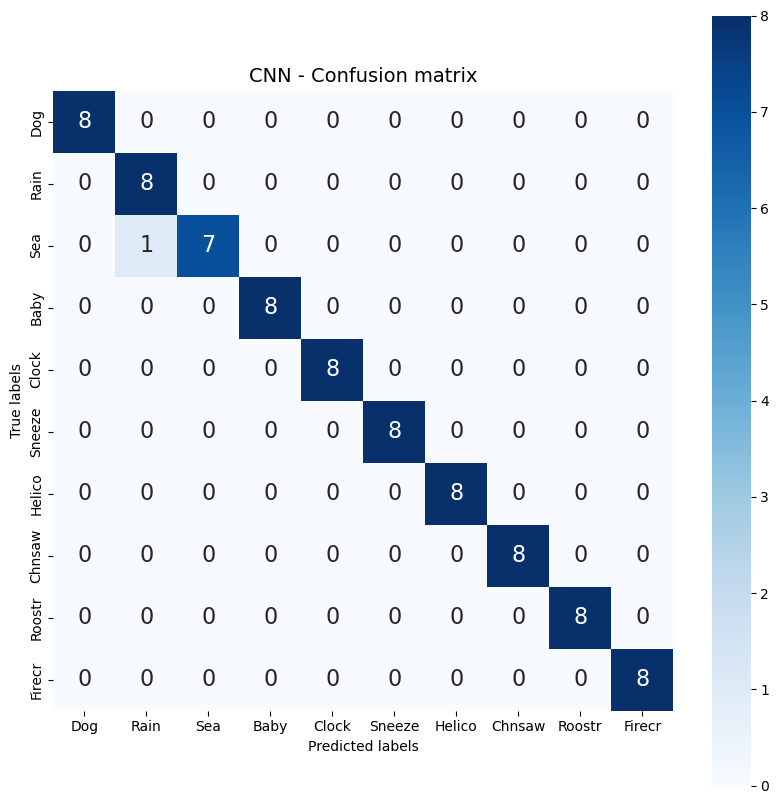

In [91]:
list_sound2=['Dog', 'Rain', 'Sea', 'Baby',  'Clock', 'Sneeze',\
                                             'Helico', 'Chnsaw',  'Roostr',  'Firecr' ] 
fig=plt.figure(figsize=(10,10))
plot_confusion_matrix(test_y.argmax(axis=1), predictions.argmax(axis=1),list_sound2)
plt.title("CNN - Confusion matrix", fontsize=14)
plt.savefig("CNN_Wavelet_ConfusionMatrix_figure01.png")
plt.show()

<span style="color:#4169E1">   There is some confusion: <br>
- in the non-stationary category resultng from vibration of tract, or nasal vibration:  dogbark, rooster, person sneeze... 
- in the impulsive noise category: clocktick and firecrackling.

We could improve this results, with higher definition mel-spectrogram. Or maybe high definition spectrograms. 

- Class = 01-Dogbark, Label = 0
- Class = 02-Rain, Label = 1
- Class = 03-Seawaves, Label = 2
- Class = 04-Babycry, Label = 3
- Class = 05-Clocktick, Label = 4
- Class = 06-Personsneeze, Label = 5
- Class = 07-Helicopter, Label = 6
- Class = 08-Chainsaw, Label = 7
- Class = 09-Rooster, Label = 8
- Class = 10-Firecrackling, Label = 9

In [92]:
def summarize_diagnostics(history):
 # plot loss
    acc = history.history['accuracy']
    epochs = range(len(acc))
    fig=plt.figure(figsize=(8,6))
    plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    #wspace=0.5,
                    hspace=0.4)
    
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(epochs, history.history['loss'], color='blue', label='Train')
    plt.plot(epochs, history.history['val_loss'], color='red', label='Test')
    plt.legend()
    plt.grid()
     # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(history.history['accuracy'], color='c', label='Train')
    plt.plot(history.history['val_accuracy'], color='crimson', label='Test')
    plt.legend()
    plt.grid()
     # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #plt.savefig(filename + '_plot.png')
    #plt.close()

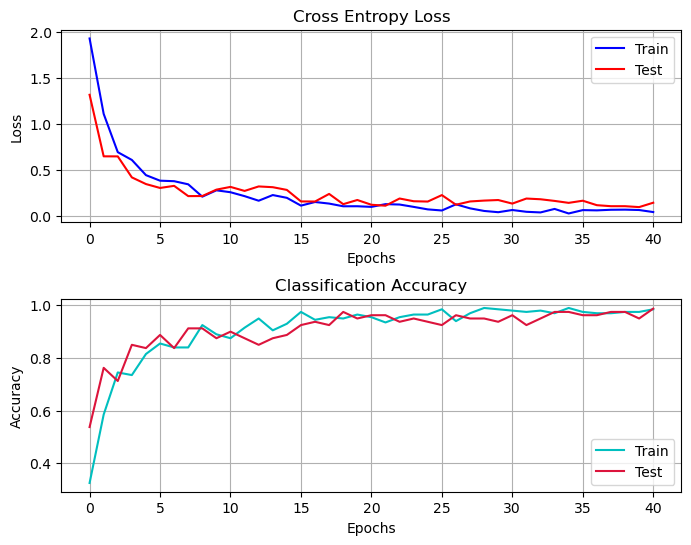

In [93]:
summarize_diagnostics(history)

#### Plot some errors 

In [94]:
np.shape(predictions), np.shape(test_X), np.shape(test_y)

((80, 10), (80, 128, 128, 3), (80, 10))

In [95]:
y_pred=np.argmax(predictions,axis=-1)
y_t=np.argmax(test_y,axis=-1)

In [96]:
predictions[1,:], test_y[1,:], y_pred[1], y_t[1]

(array([5.9070000e-03, 4.8637335e-06, 7.1169001e-07, 1.0852745e-03,
        3.1450926e-04, 9.7234738e-01, 2.0717511e-05, 2.0271366e-02,
        3.7445434e-06, 4.4527264e-05], dtype=float32),
 array([1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e+00, 1.e-09, 1.e-09,
        1.e-09, 1.e-09], dtype=float32),
 5,
 5)

In [97]:
errors=[ i for i in range(len(y_t)) if  y_pred[i]!=y_t[i] ]

In [98]:
ind_e=errors[0]
ind_e

63

Text(0.5, 1.0, 'Pred Error - Mel Spectrogram')

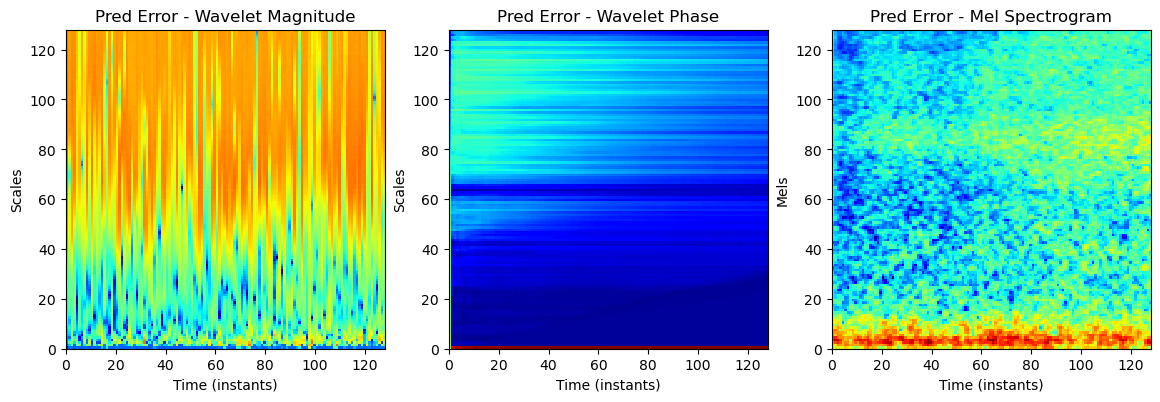

In [99]:
#plt.imshow(sub_time, scales, features_cwt_CNN[122,::-1,:,0] ,cmap='gray')
fig=plt.figure(figsize=(14,10))

plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    #wspace=0.5,
                    hspace=0.4)

ax = fig.add_subplot(1, 3, 1)
plt.imshow(test_X[ind_e,::-1,:,0] ,cmap='jet',interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
ax.set_xlabel('Time (instants)')
ax.set_ylabel('Scales')
ax.set_title('Pred Error - Wavelet Magnitude')
ax = fig.add_subplot(1, 3, 2)
#---
plt.imshow(test_X[ind_e,::-1,:,1] ,cmap='jet',interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
ax.set_xlabel('Time (instants)')
ax.set_ylabel('Scales')
ax.set_title('Pred Error - Wavelet Phase')
#---
ax = fig.add_subplot(1, 3, 3)
plt.imshow(test_X[ind_e,::-1,:,2] ,cmap='jet',interpolation='none', extent=[0,np.shape(data_cwt_mag)[2],0,len(scales)])
ax.set_xlabel('Time (instants)')
ax.set_ylabel('Mels')
ax.set_title('Pred Error - Mel Spectrogram')



#### Identifying audio clip in classification error   

<span style="color:#4169E1">
We plot the wavelet magnitude of the 40 sounds <b>in the initial Sea wave dataset </b>. Audio clip  <b>116</b> is at fault.  

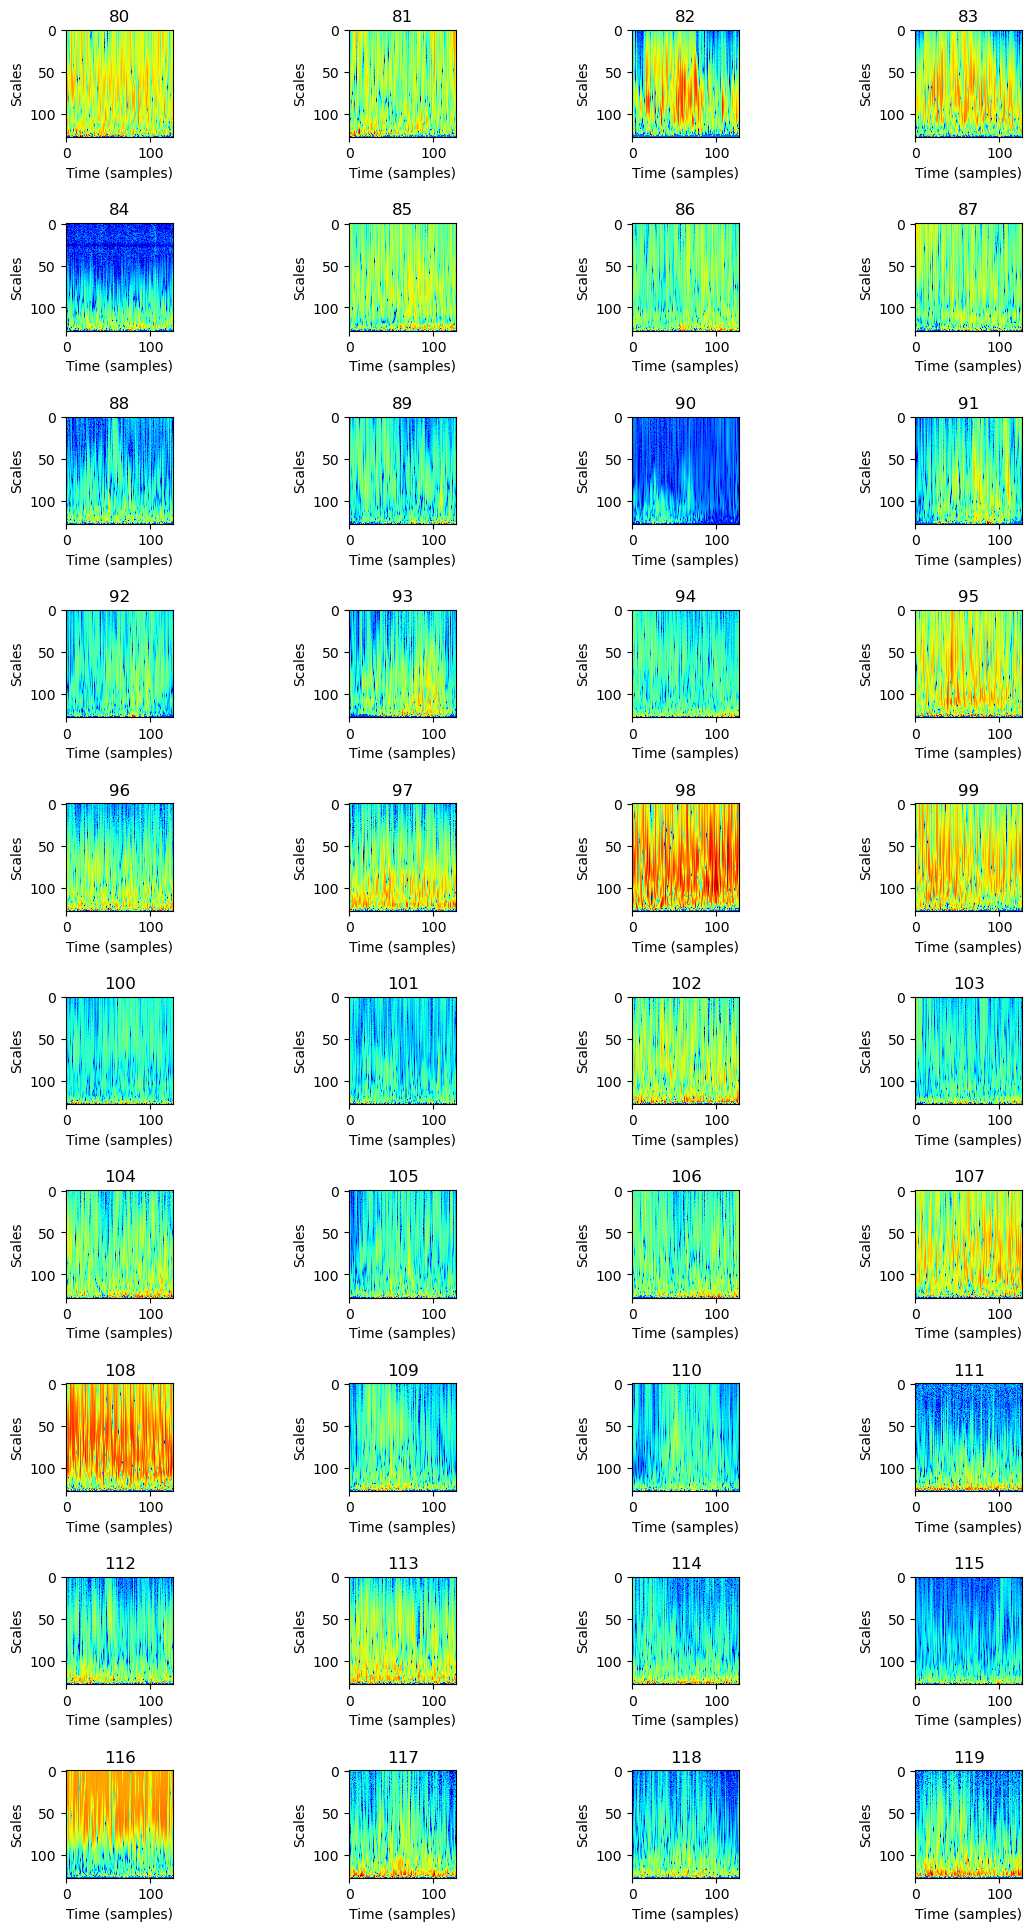

In [100]:
fig=plt.figure(figsize=(14,24))

plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    #wspace=0.5,
                    hspace=0.8)
    


for jj in range(0,40):  

    ax = fig.add_subplot(10, 4, jj+1)
    plt.imshow(features_cwt_CNN[80+jj,::-1,:,0],
               cmap='jet',interpolation='none' )
    plt.title(str(80+jj))
    
    
               #,extent=[0,np.shape(data_cwt_mag)[2],
                       #0,
                       #len(scales)])
    ax.set_xlabel('Time (samples)')
    ax.set_ylabel('Scales')
    #ax.set_title('Dog bark - Wavelet Transform Magnitude')
